<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/InsectDetection/Segmentation_with_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Augmentation with Segmentation**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
my_folder_path = 'https://drive.google.com/drive/folders/1J_XyVRFE15SzLjFtT4Z1OrabYlNeDHGQ?usp=share_link'

In [3]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 288 (delta 114), reused 135 (delta 90), pack-reused 113
Receiving objects: 100% (288/288), 77.85 MiB | 40.47 MiB/s, done.
Resolving deltas: 100% (184/184), done.


In [4]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.9 MB/s eta 0:00:00


In [5]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [6]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/Training')
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}

In [7]:
import cv2

img_no = 1
x = []
y = []
z = []
histo = []

for cls in classes:
    input_path = '/content/drive/MyDrive/Insect/Training/' + cls
    output_path = '/content/drive/MyDrive/Insect/Preprocessed/' + cls

    # Create output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for j in os.listdir(input_path):
        realimage = cv2.imread(os.path.join(input_path, j), 1)

        # Preprocessing steps
        resizedImage = cv2.resize(realimage, (400, 400))

        color_contrastImage = img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))

        smooth_image = img_as_ubyte(cv2.GaussianBlur(color_contrastImage, (5, 5), 0, borderType=cv2.BORDER_CONSTANT))

        R, G, B = cv2.split(smooth_image)
        op_R = cv2.equalizeHist(R)
        op_G = cv2.equalizeHist(G)
        op_B = cv2.equalizeHist(B)
        histogram_image = cv2.merge((op_R, op_G, op_B))

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        op2_R = clahe.apply(R)
        op2_G = clahe.apply(G)
        op2_B = clahe.apply(B)
        clahe_image = cv2.merge((op2_R, op2_G, op2_B))

        x.append(clahe_image)
        y.append(classes[cls])
        z.append(realimage)
        histo.append(histogram_image)

        img_no += 1

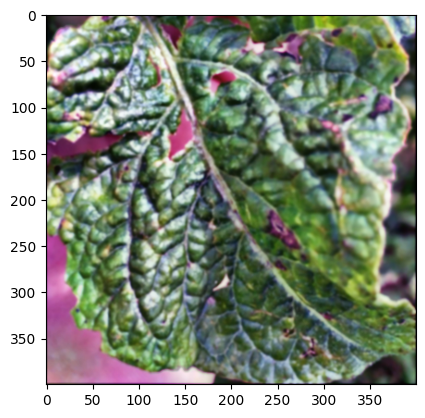

In [8]:
plt.imshow(x[150])

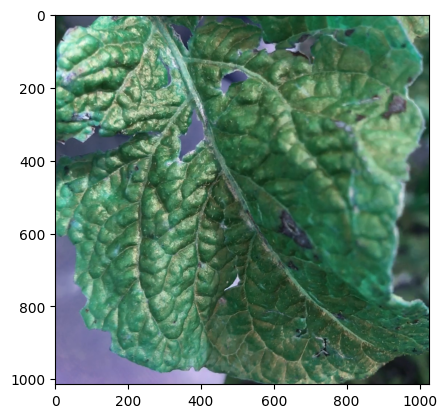

In [9]:
plt.imshow(z[150])

In [10]:
classes = ['Insect_Coloradopotatobeetle', 'Insect_Fleabeetle']

for cls in classes:
    input_path = f'/content/drive/MyDrive/Insect/Preprocessed/'+ cls
    output_path = f'/content/drive/MyDrive/Insect/AugmentationImages/'+ cls

    target_size = 400

    # Augmentation parameters
    rotation_range = 30  # Rotation angle range in degrees
    scale_range = 0.2  # Scaling factor range

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Get the list of image files in the dataset directory
    image_files = [file for file in os.listdir(input_path) if file.endswith(".jpg") or file.endswith(".png")]

    # Shuffle the image files list
    np.random.shuffle(image_files)

    # Loop over each image file
    for file in image_files:
        if len(image_files) >= target_size:
            break

        # Read the image
        image_path = os.path.join(input_path, file)
        print(f"Reading image: {image_path}")
        image = cv2.imread(image_path)

        if image is None:
            print(f"Failed to read image: {image_path}")
            continue

        # Apply random augmentation
        for i in range(10):  # Generate 10 augmented versions for each image
            # Apply random rotation
            angle = np.random.uniform(-rotation_range, rotation_range)
            rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
            rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

            # Apply random flipping
            flip_direction = np.random.randint(-1, 2)
            flipped_image = cv2.flip(rotated_image, flip_direction)

            # Save augmented image
            augmented_file = f"augmented_{len(image_files)}.jpg"
            augmented_path = os.path.join(output_path, augmented_file)
            #cv2.imwrite(augmented_path, transformed_image)

            # Add augmented image to the list
            image_files.append(augmented_file)

            if len(image_files) >= target_size:
                break
#Every 50 augmented images generated, a progress message is printed
        if len(image_files) % 50 == 0:
            print(f"Generated {len(image_files)} augmented images.")

print("Data augmentation complete!")

Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/102.jpg
Generated 200 augmented images.
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/137.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/55.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/155.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/152.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/104.jpg
Generated 250 augmented images.
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/133.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/131.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/163.jpg
Reading image: /content/drive/MyDrive/Insect/Preprocessed/Insect_Coloradopotatobeetle/156.j

In [11]:
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}
class_counts = {}

for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgremoveImagesNew/' + cls
    file_count = len([f for f in os.listdir(pth) if os.path.isfile(os.path.join(pth, f))])
    class_counts[cls] = file_count

# Print the number of images for each class
for cls, count in class_counts.items():
    print(f"Number of images for class {cls}: {count}")

Number of images for class Insect_Coloradopotatobeetle: 400
Number of images for class Insect_Fleabeetle: 409


In [ ]:
classes = ['Insect_Coloradopotatobeetle', 'Insect_Fleabeetle']
output_base_path = '/content/drive/MyDrive/Insect/bgremoveImagesNew/'

img_no = 1  # Counter for saving the processed images

for cls in classes:
    input_path = f'/content/drive/MyDrive/Insect/preprocessing_augmentation/{cls}'

    # Create the output directory for the class if it doesn't exist
    output_path = os.path.join(output_base_path, cls)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for j, file in enumerate(os.listdir(input_path)):
        image_path = os.path.join(input_path, file)
        realimage = cv2.imread(image_path, 1)
        img1 = cv2.resize(realimage, (400, 400))
#The image data type is converted to uint8 using img_as_ubyte() function from skimage library.
        new_img = img_as_ubyte(img1)
        bg_rem_img = remove(new_img)
        bg_rem_img_BGR = cv2.cvtColor(bg_rem_img, cv2.COLOR_BGR2RGB)
        x.append(bg_rem_img)

        output_file = os.path.join(output_path, f'{img_no}.jpg')
        #cv2.imwrite(output_file, bg_rem_img_BGR)

        img_no += 1

print("Removing bg and saving complete!")

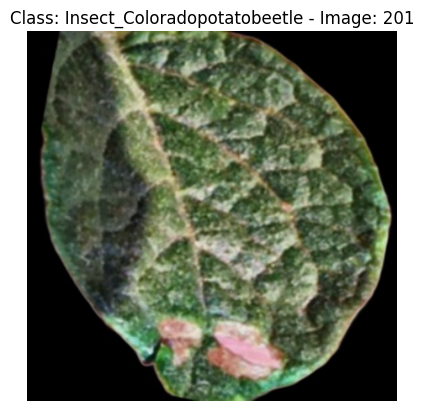

In [12]:
import matplotlib.pyplot as plt

# Path to the directory containing the processed images
processed_images_path = '/content/drive/MyDrive/Insect/bgremoveImagesNew'

# Function to display a specific image
def show_image(cls, img_num):
    class_output_path = os.path.join(processed_images_path, cls)
    image_path = os.path.join(class_output_path, f'{img_num}.jpg')
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f'Class: {cls} - Image: {img_num}')
    plt.axis('off')
    plt.show()

# Choose the image to display
cls = 'Insect_Coloradopotatobeetle'
img_num = 201  # Specify the image number

# Display the chosen image
show_image(cls, img_num)


In [13]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split

In [16]:
path = '/content/drive/MyDrive/Insect/bgremoveImagesNew/'
classes = {'Colorado': 0, 'flea': 1}

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def segmentation1(img):
  # Load the image of the tomato plant
  # Convert the image to HSV color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Define the color range for the lesion areas
  lower = np.array([37, 28, 0])
  upper = np.array([95, 255, 253])

  # Create a binary mask for the lesion areas
  mask = cv2.inRange(hsv, lower, upper)
  plt.imshow(mask)

  # Apply morphological operations to remove noise and smooth the edges of the lesion areas
  kernel = np.ones((5,5), np.uint8)
  mask = cv2.erode(mask, kernel, iterations=1)
  mask = cv2.dilate(mask, kernel, iterations=1)

  # Calculate the perimeter and circularity of the lesion areas
  contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  perimeters = []
  for contour in contours:
      perimeter = cv2.arcLength(contour, True)
      perimeters.append(perimeter)

  indices = np.argsort(perimeters)[::-1][:5]

  if len(contours) > 0:
      contour1 = contours[indices[0]]
      perimeter1 = perimeters[indices[0]]
      area1 = cv2.contourArea(contour1)
      circularity1 = (4 * 3.1416 * area1) / (perimeter1 ** 2)
  else:
      perimeter1 = 0
      circularity1 = -1

  if len(contours) > 1 :
      contour2 = contours[indices[1]]
      perimeter2 = perimeters[indices[1]]
      area2 = cv2.contourArea(contour2)
      circularity2 = (4 * 3.1416 * area2) / (perimeter2 ** 2)
  else:
      perimeter2 = 0
      circularity2 = -1

  if len(contours) > 2 :
      contour3 = contours[indices[2]]
      perimeter3 = perimeters[indices[2]]
      area3 = cv2.contourArea(contour3)
      circularity3 = (4 * 3.1416 * area3) / (perimeter3 ** 2)
  else:
      perimeter3 = 0
      circularity3 = -1

  if len(contours) > 3 :
      contour4 = contours[indices[3]]
      perimeter4 = perimeters[indices[3]]
      area4 = cv2.contourArea(contour4)
      circularity4 = (4 * 3.1416 * area4) / (perimeter4 ** 2)
  else:
      perimeter4 = 0
      circularity4 = -1

  if len(contours) > 4 :
      contour5 = contours[indices[4]]
      perimeter5 = perimeters[indices[4]]
      area5 = cv2.contourArea(contour5)
      circularity5 = (4 * 3.1416 * area5) / (perimeter5 ** 2)
  else:
      perimeter5 = 0
      circularity5 = -1

  # Print the feature values
  print("Perimeter1:", perimeter1)
  print("Circularity1:", circularity1)
  print("Perimeter2:", perimeter2)
  print("Circularity2:", circularity2)
  print("Perimeter3:", perimeter3)
  print("Circularity3:", circularity3)
  print("Perimeter4:", perimeter4)
  print("Circularity4:", circularity4)
  print("Perimeter5:", perimeter5)
  print("Circularity5:", circularity5)
  print("No of:", len(contours))

  return([perimeter1,circularity1,perimeter2,circularity2,perimeter3,circularity3,perimeter4,circularity4,perimeter5,circularity5,len(contours)])

Texture and Edge Features:
['Contrast', 'Energy', 'Homogeneity', 'Correlation', 'Edge Count']


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1645.7097985744476
Circularity1: 0.03766169965883871
Perimeter2: 1635.8864240646362
Circularity2: 0.04707954785508823
Perimeter3: 1218.3229358196259
Circularity3: 0.0963786694258848
Perimeter4: 1153.636643409729
Circularity4: 0.0857917501569646
Perimeter5: 739.0437167882919
Circularity5: 0.09002859434664523
No of: 118
Perimeter1: 1645.7097985744476
Circularity1: 0.03766169965883871
Perimeter2: 1635.8864240646362
Circularity2: 0.04707954785508823
Perimeter3: 1218.3229358196259
Circularity3: 0.0963786694258848
Perimeter4: 1153.636643409729
Circularity4: 0.0857917501569646
Perimeter5: 739.0437167882919
Circularity5: 0.09002859434664523
No of: 118
Perimeter1: 1645.7097985744476
Circularity1: 0.03766169965883871
Perimeter2: 1635.8864240646362
Circularity2: 0.04707954785508823
Perimeter3: 1218.3229358196259
Circularity3: 0.0963786694258848
Perimeter4: 1153.636643409729
Circularity4: 0.0857917501569646
Perimeter5: 739.0437167882919
Circularity5: 0.09002859434664523
No of: 118


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1645.7097985744476
Circularity1: 0.03766169965883871
Perimeter2: 1635.8864240646362
Circularity2: 0.04707954785508823
Perimeter3: 1218.3229358196259
Circularity3: 0.0963786694258848
Perimeter4: 1153.636643409729
Circularity4: 0.0857917501569646
Perimeter5: 739.0437167882919
Circularity5: 0.09002859434664523
No of: 118
Perimeter1: 1645.7097985744476
Circularity1: 0.03766169965883871
Perimeter2: 1635.8864240646362
Circularity2: 0.04707954785508823
Perimeter3: 1218.3229358196259
Circularity3: 0.0963786694258848
Perimeter4: 1153.636643409729
Circularity4: 0.0857917501569646
Perimeter5: 739.0437167882919
Circularity5: 0.09002859434664523
No of: 118
Perimeter1: 562.7766915559769
Circularity1: 0.14841176658144856
Perimeter2: 273.4802289009094
Circularity2: 0.23405079819154676
Perimeter3: 258.95331728458405
Circularity3: 0.17043964669378037
Perimeter4: 253.19595801830292
Circularity4: 0.14995424963056192
Perimeter5: 226.95331740379333
Circularity5: 0.1684618214141788
No of: 176


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 6175.587325334549
Circularity1: 0.03603254816409989
Perimeter2: 252.8528118133545
Circularity2: 0.2533542663264755
Perimeter3: 251.2964631319046
Circularity3: 0.22655370150507084
Perimeter4: 196.22539567947388
Circularity4: 0.22062115228973106
Perimeter5: 113.59797883033752
Circularity5: 0.3320657240673903
No of: 22
Perimeter1: 6175.587325334549
Circularity1: 0.03603254816409989
Perimeter2: 252.8528118133545
Circularity2: 0.2533542663264755
Perimeter3: 251.2964631319046
Circularity3: 0.22655370150507084
Perimeter4: 196.22539567947388
Circularity4: 0.22062115228973106
Perimeter5: 113.59797883033752
Circularity5: 0.3320657240673903
No of: 22
Perimeter1: 6175.587325334549
Circularity1: 0.03603254816409989
Perimeter2: 252.8528118133545
Circularity2: 0.2533542663264755
Perimeter3: 251.2964631319046
Circularity3: 0.22655370150507084
Perimeter4: 196.22539567947388
Circularity4: 0.22062115228973106
Perimeter5: 113.59797883033752
Circularity5: 0.3320657240673903
No of: 22
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 6175.587325334549
Circularity1: 0.03603254816409989
Perimeter2: 252.8528118133545
Circularity2: 0.2533542663264755
Perimeter3: 251.2964631319046
Circularity3: 0.22655370150507084
Perimeter4: 196.22539567947388
Circularity4: 0.22062115228973106
Perimeter5: 113.59797883033752
Circularity5: 0.3320657240673903
No of: 22
Perimeter1: 5422.702988386154
Circularity1: 0.03833332827389613
Perimeter2: 260.50966584682465
Circularity2: 0.1957213412476232
Perimeter3: 137.84061920642853
Circularity3: 0.3455753397108056
Perimeter4: 60.72792184352875
Circularity4: 0.7888329371728154
Perimeter5: 40.485281229019165
Circularity5: 0.6440147953592317
No of: 21
Perimeter1: 7131.542729735374
Circularity1: 0.023288246034996553
Perimeter2: 554.676186800003
Circularity2: 0.0891223405057321
Perimeter3: 475.26197278499603
Circularity3: 0.16503995610088468
Perimeter4: 257.5391038656235
Circularity4: 0.3974934741976239
Perimeter5: 181.154327750206
Circularity5: 0.21118300674745857
No of: 28
Perimeter1: 3

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3587.0276819467545
Circularity1: 0.1009822774216858
Perimeter2: 48.485281229019165
Circularity2: 0.5666265327762897
Perimeter3: 41.899494767189026
Circularity3: 0.6478014062238607
Perimeter4: 38.24264061450958
Circularity4: 0.44250926098194937
Perimeter5: 36.485281229019165
Circularity5: 0.7646461429175218
No of: 12
Perimeter1: 3587.0276819467545
Circularity1: 0.1009822774216858
Perimeter2: 48.485281229019165
Circularity2: 0.5666265327762897
Perimeter3: 41.899494767189026
Circularity3: 0.6478014062238607
Perimeter4: 38.24264061450958
Circularity4: 0.44250926098194937
Perimeter5: 36.485281229019165
Circularity5: 0.7646461429175218
No of: 12
Perimeter1: 3587.0276819467545
Circularity1: 0.1009822774216858
Perimeter2: 48.485281229019165
Circularity2: 0.5666265327762897
Perimeter3: 41.899494767189026
Circularity3: 0.6478014062238607
Perimeter4: 38.24264061450958
Circularity4: 0.44250926098194937
Perimeter5: 36.485281229019165
Circularity5: 0.7646461429175218
No of: 12
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag


Circularity4: 0.2664064032723638
Perimeter5: 408.1076453924179
Circularity5: 0.11936249746139693
No of: 35
Perimeter1: 6112.717270255089
Circularity1: 0.029393661893579278
Perimeter2: 731.3279881477356
Circularity2: 0.06968794173594144
Perimeter3: 521.9898954629898
Circularity3: 0.15113433126818554
Perimeter4: 416.55129635334015
Circularity4: 0.2664064032723638
Perimeter5: 408.1076453924179
Circularity5: 0.11936249746139693
No of: 35
Perimeter1: 6112.717270255089
Circularity1: 0.029393661893579278
Perimeter2: 731.3279881477356
Circularity2: 0.06968794173594144
Perimeter3: 521.9898954629898
Circularity3: 0.15113433126818554
Perimeter4: 416.55129635334015
Circularity4: 0.2664064032723638
Perimeter5: 408.1076453924179
Circularity5: 0.11936249746139693
No of: 35


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 6112.717270255089
Circularity1: 0.029393661893579278
Perimeter2: 731.3279881477356
Circularity2: 0.06968794173594144
Perimeter3: 521.9898954629898
Circularity3: 0.15113433126818554
Perimeter4: 416.55129635334015
Circularity4: 0.2664064032723638
Perimeter5: 408.1076453924179
Circularity5: 0.11936249746139693
No of: 35
Perimeter1: 3622.618520617485
Circularity1: 0.14030206572684836
Perimeter2: 82.97056233882904
Circularity2: 0.3815127869821512
Perimeter3: 64.14213538169861
Circularity3: 0.6689107356842172
Perimeter4: 61.899494767189026
Circularity4: 0.3755278560066488
Perimeter5: 54.82842707633972
Circularity5: 0.2926155124251123
No of: 10
Perimeter1: 1911.692552804947
Circularity1: 0.045517746842893364
Perimeter2: 861.269112944603
Circularity2: 0.15885359588495332
Perimeter3: 810.9848424196243
Circularity3: 0.09180763442897348
Perimeter4: 471.6639940738678
Circularity4: 0.10153466261121197
Perimeter5: 459.806129693985
Circularity5: 0.11094030632739861
No of: 56


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2755.3636881113052
Circularity1: 0.18315805502758162
Perimeter2: 166.04163014888763
Circularity2: 0.4396217133957752
Perimeter3: 123.65685415267944
Circularity3: 0.17997766242783367
Perimeter4: 70.72792172431946
Circularity4: 0.5890768187613648
Perimeter5: 62.14213538169861
Circularity5: 0.40351549770031275
No of: 11
Perimeter1: 2755.3636881113052
Circularity1: 0.18315805502758162
Perimeter2: 166.04163014888763
Circularity2: 0.4396217133957752
Perimeter3: 123.65685415267944
Circularity3: 0.17997766242783367
Perimeter4: 70.72792172431946
Circularity4: 0.5890768187613648
Perimeter5: 62.14213538169861
Circularity5: 0.40351549770031275
No of: 11


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2755.3636881113052
Circularity1: 0.18315805502758162
Perimeter2: 166.04163014888763
Circularity2: 0.4396217133957752
Perimeter3: 123.65685415267944
Circularity3: 0.17997766242783367
Perimeter4: 70.72792172431946
Circularity4: 0.5890768187613648
Perimeter5: 62.14213538169861
Circularity5: 0.40351549770031275
No of: 11
Perimeter1: 2755.3636881113052
Circularity1: 0.18315805502758162
Perimeter2: 166.04163014888763
Circularity2: 0.4396217133957752
Perimeter3: 123.65685415267944
Circularity3: 0.17997766242783367
Perimeter4: 70.72792172431946
Circularity4: 0.5890768187613648
Perimeter5: 62.14213538169861
Circularity5: 0.40351549770031275
No of: 11
Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040744346
Perimeter2: 1510.832601428032
Circularity2: 0.04408065232563375
Perimeter3: 932.6416957378387
Circularity3: 0.08064381348645273
Perimeter4: 615.889389872551
Circularity4: 0.09618941093433843
Perimeter5: 582.5340505838394
Circularity5: 0.1300907439474796
No of: 93


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3392.4103726148605
Circularity1: 0.15292892358442015
Perimeter2: 55.31370830535889
Circularity2: 0.5996504792512232
Perimeter3: 49.899494767189026
Circularity3: 0.5374872796384249
Perimeter4: 49.899494767189026
Circularity4: 0.6485175158078649
Perimeter5: 48.14213538169861
Circularity5: 0.5042467740590323
No of: 8
Perimeter1: 3392.4103726148605
Circularity1: 0.15292892358442015
Perimeter2: 55.31370830535889
Circularity2: 0.5996504792512232
Perimeter3: 49.899494767189026
Circularity3: 0.5374872796384249
Perimeter4: 49.899494767189026
Circularity4: 0.6485175158078649
Perimeter5: 48.14213538169861
Circularity5: 0.5042467740590323
No of: 8
Perimeter1: 3392.4103726148605
Circularity1: 0.15292892358442015
Perimeter2: 55.31370830535889
Circularity2: 0.5996504792512232
Perimeter3: 49.899494767189026
Circularity3: 0.5374872796384249
Perimeter4: 49.899494767189026
Circularity4: 0.6485175158078649
Perimeter5: 48.14213538169861
Circularity5: 0.5042467740590323
No of: 8
Perimeter1: 3392

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 5129.3232679367065
Circularity1: 0.041886396460753386
Perimeter2: 129.4558436870575
Circularity2: 0.2654427223309864
Perimeter3: 74.97056233882904
Circularity3: 0.37561127860214083
Perimeter4: 58.72792184352875
Circularity4: 0.442688144410832
Perimeter5: 50.97056245803833
Circularity5: 0.5127172069947536
No of: 18
Perimeter1: 5129.3232679367065
Circularity1: 0.041886396460753386
Perimeter2: 129.4558436870575
Circularity2: 0.2654427223309864
Perimeter3: 74.97056233882904
Circularity3: 0.37561127860214083
Perimeter4: 58.72792184352875
Circularity4: 0.442688144410832
Perimeter5: 50.97056245803833
Circularity5: 0.5127172069947536
No of: 18
Perimeter1: 5129.3232679367065
Circularity1: 0.041886396460753386
Perimeter2: 129.4558436870575
Circularity2: 0.2654427223309864
Perimeter3: 74.97056233882904
Circularity3: 0.37561127860214083
Perimeter4: 58.72792184352875
Circularity4: 0.442688144410832
Perimeter5: 50.97056245803833
Circularity5: 0.5127172069947536
No of: 18
Perimeter1: 2938

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2938.2022211551666
Circularity1: 0.18348287321874818
Perimeter2: 632.5756813287735
Circularity2: 0.160616100849637
Perimeter3: 279.1959581375122
Circularity3: 0.22037439881615126
Perimeter4: 253.78174424171448
Circularity4: 0.20126087475971718
Perimeter5: 245.19595801830292
Circularity5: 0.318334837929668
No of: 12
Perimeter1: 2938.2022211551666
Circularity1: 0.18348287321874818
Perimeter2: 632.5756813287735
Circularity2: 0.160616100849637
Perimeter3: 279.1959581375122
Circularity3: 0.22037439881615126
Perimeter4: 253.78174424171448
Circularity4: 0.20126087475971718
Perimeter5: 245.19595801830292
Circularity5: 0.318334837929668
No of: 12
Perimeter1: 3389.277462363243
Circularity1: 0.043090607112129226
Perimeter2: 2051.574802994728
Circularity2: 0.09247544926621173
Perimeter3: 810.0142797231674
Circularity3: 0.18574096995598524
Perimeter4: 555.7472543716431
Circularity4: 0.193243155280813
Perimeter5: 406.93607234954834
Circularity5: 0.1311300538657657
No of: 31
Perimeter1: 3

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3389.277462363243
Circularity1: 0.043090607112129226
Perimeter2: 2051.574802994728
Circularity2: 0.09247544926621173
Perimeter3: 810.0142797231674
Circularity3: 0.18574096995598524
Perimeter4: 555.7472543716431
Circularity4: 0.193243155280813
Perimeter5: 406.93607234954834
Circularity5: 0.1311300538657657
No of: 31
Perimeter1: 3389.277462363243
Circularity1: 0.043090607112129226
Perimeter2: 2051.574802994728
Circularity2: 0.09247544926621173
Perimeter3: 810.0142797231674
Circularity3: 0.18574096995598524
Perimeter4: 555.7472543716431
Circularity4: 0.193243155280813
Perimeter5: 406.93607234954834
Circularity5: 0.1311300538657657
No of: 31
Perimeter1: 2536.035699248314
Circularity1: 0.1437447710137514
Perimeter2: 1983.68541431427
Circularity2: 0.06348973360156338
Perimeter3: 742.1736602783203
Circularity3: 0.09081078574964527
Perimeter4: 547.7472543716431
Circularity4: 0.1732540875584834
Perimeter5: 414.3502856492996
Circularity5: 0.2454561427201301
No of: 31
Perimeter1: 1314

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1945.3494081497192
Circularity1: 0.03382522037485751
Perimeter2: 1231.636643409729
Circularity2: 0.05490705827825332
Perimeter3: 1082.3401800394058
Circularity3: 0.06432520148595777
Perimeter4: 652.6173115968704
Circularity4: 0.07508989317755162
Perimeter5: 596.5340510606766
Circularity5: 0.11053116292022819
No of: 125
Perimeter1: 1210.8914771080017
Circularity1: 0.05647885054081764
Perimeter2: 1147.1097325086594
Circularity2: 0.09610588925407355
Perimeter3: 875.972650051117
Circularity3: 0.11651294238596775
Perimeter4: 696.3746708631516
Circularity4: 0.0809665205233661
Perimeter5: 510.39191567897797
Circularity5: 0.09647911291973411
No of: 126
Perimeter1: 1486.548330783844
Circularity1: 0.05390329774712476
Perimeter2: 1368.6732206344604
Circularity2: 0.0671063034144633
Perimeter3: 1148.2813050746918
Circularity3: 0.07664880012470535
Perimeter4: 771.6295038461685
Circularity4: 0.10716258024047569
Perimeter5: 611.7056243419647
Circularity5: 0.10914636919461186
No of: 103
Per

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2796.4347549676895
Circularity1: 0.022118015672618195
Perimeter2: 1744.957492351532
Circularity2: 0.05506122081948277
Perimeter3: 927.1858525276184
Circularity3: 0.09087787310676497
Perimeter4: 861.2863577604294
Circularity4: 0.15948248818178715
Perimeter5: 580.1320307254791
Circularity5: 0.08938843548925599
No of: 90
Perimeter1: 3689.6033629179
Circularity1: 0.1055520801336806
Perimeter2: 646.1736599206924
Circularity2: 0.2420189900100685
Perimeter3: 308.5096662044525
Circularity3: 0.20477886221952907
Perimeter4: 272.95331728458405
Circularity4: 0.30975980247986223
Perimeter5: 148.56854140758514
Circularity5: 0.39966330226070934
No of: 19
Perimeter1: 3653.9809988737106
Circularity1: 0.019654445706737127
Perimeter2: 1760.7564816474915
Circularity2: 0.08056607402902961
Perimeter3: 907.8549002408981
Circularity3: 0.11175123841481553
Perimeter4: 574.5756808519363
Circularity4: 0.07869767773776284
Perimeter5: 486.77669191360474
Circularity5: 0.11426094934798453
No of: 88
Perime

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

0.2420189900100685
Perimeter3: 308.5096662044525
Circularity3: 0.20477886221952907
Perimeter4: 272.95331728458405
Circularity4: 0.30975980247986223
Perimeter5: 148.56854140758514
Circularity5: 0.39966330226070934
No of: 19
Perimeter1: 2583.0966606140137
Circularity1: 0.10464422118879964
Perimeter2: 2043.9179493188858
Circularity2: 0.07630350944878538
Perimeter3: 866.7838314771652
Circularity3: 0.07267399875601874
Perimeter4: 737.2447280883789
Circularity4: 0.15834877007099632
Perimeter5: 440.93607211112976
Circularity5: 0.1414833658619512
No of: 25
Perimeter1: 3087.2631816864014
Circularity1: 0.09034808552282972
Perimeter2: 1529.6021536588669
Circularity2: 0.07081643188923527
Perimeter3: 603.019332408905
Circularity3: 0.10564375933599517
Perimeter4: 380.793937087059
Circularity4: 0.2031367205380634
Perimeter5: 228.4680359363556
Circularity5: 0.2456818038846308
No of: 69
Perimeter1: 2785.4469475746155
Circularity1: 0.07618751247177742
Perimeter2: 2090.4032298326492
Circularity2: 0.05193

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1867.2417616844177
Circularity1: 0.04554456697679338
Perimeter2: 1036.5828211307526
Circularity2: 0.08301161443826797
Perimeter3: 627.102593421936
Circularity3: 0.11254417904732861
Perimeter4: 600.2325356006622
Circularity4: 0.13793147935104605
Perimeter5: 541.5046136379242
Circularity5: 0.09912476939950404
No of: 120
Perimeter1: 1867.2417616844177
Circularity1: 0.04554456697679338
Perimeter2: 1036.5828211307526
Circularity2: 0.08301161443826797
Perimeter3: 627.102593421936
Circularity3: 0.11254417904732861
Perimeter4: 600.2325356006622
Circularity4: 0.13793147935104605
Perimeter5: 541.5046136379242
Circularity5: 0.09912476939950404
No of: 120
Perimeter1: 1867.2417616844177
Circularity1: 0.04554456697679338
Perimeter2: 1036.5828211307526
Circularity2: 0.08301161443826797
Perimeter3: 627.102593421936
Circularity3: 0.11254417904732861
Perimeter4: 600.2325356006622
Circularity4: 0.13793147935104605
Perimeter5: 541.5046136379242
Circularity5: 0.09912476939950404
No of: 120
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3689.6033629179
Circularity1: 0.1055520801336806
Perimeter2: 646.1736599206924
Circularity2: 0.2420189900100685
Perimeter3: 308.5096662044525
Circularity3: 0.20477886221952907
Perimeter4: 272.95331728458405
Circularity4: 0.30975980247986223
Perimeter5: 148.56854140758514
Circularity5: 0.39966330226070934
No of: 19
Perimeter1: 3689.6033629179
Circularity1: 0.1055520801336806
Perimeter2: 646.1736599206924
Circularity2: 0.2420189900100685
Perimeter3: 308.5096662044525
Circularity3: 0.20477886221952907
Perimeter4: 272.95331728458405
Circularity4: 0.30975980247986223
Perimeter5: 148.56854140758514
Circularity5: 0.39966330226070934
No of: 19
Perimeter1: 3689.6033629179
Circularity1: 0.1055520801336806
Perimeter2: 646.1736599206924
Circularity2: 0.2420189900100685
Perimeter3: 308.5096662044525
Circularity3: 0.20477886221952907
Perimeter4: 272.95331728458405
Circularity4: 0.30975980247986223
Perimeter5: 148.56854140758514
Circularity5: 0.39966330226070934
No of: 19
Perimeter1: 5731

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2652.351493358612
Circularity1: 0.02713711515708273
Perimeter2: 2316.0012102127075
Circularity2: 0.057615056971493564
Perimeter3: 950.0975395441055
Circularity3: 0.05926225091590122
Perimeter4: 847.5289978981018
Circularity4: 0.07148256192582046
Perimeter5: 644.7178165912628
Circularity5: 0.09122603816572662
No of: 71
Perimeter1: 1867.2417616844177
Circularity1: 0.04554456697679338
Perimeter2: 1036.5828211307526
Circularity2: 0.08301161443826797
Perimeter3: 627.102593421936
Circularity3: 0.11254417904732861
Perimeter4: 600.2325356006622
Circularity4: 0.13793147935104605
Perimeter5: 541.5046136379242
Circularity5: 0.09912476939950404
No of: 120
Perimeter1: 3689.6033629179
Circularity1: 0.1055520801336806
Perimeter2: 646.1736599206924
Circularity2: 0.2420189900100685
Perimeter3: 308.5096662044525
Circularity3: 0.20477886221952907
Perimeter4: 272.95331728458405
Circularity4: 0.30975980247986223
Perimeter5: 148.56854140758514
Circularity5: 0.39966330226070934
No of: 19
Perimete

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 4038.431789159775
Circularity1: 0.02444213234354301
Perimeter2: 2871.297673225403
Circularity2: 0.11027446731400818
Perimeter3: 157.49747347831726
Circularity3: 0.2961066850449912
Perimeter4: 130.6690467596054
Circularity4: 0.3551098766425968
Perimeter5: 119.01219236850739
Circularity5: 0.4138849328381228
No of: 28
Perimeter1: 2652.351493358612
Circularity1: 0.02713711515708273
Perimeter2: 2316.0012102127075
Circularity2: 0.057615056971493564
Perimeter3: 950.0975395441055
Circularity3: 0.05926225091590122
Perimeter4: 847.5289978981018
Circularity4: 0.07148256192582046
Perimeter5: 644.7178165912628
Circularity5: 0.09122603816572662
No of: 71
Perimeter1: 2499.8245837688446
Circularity1: 0.025091081942892182
Perimeter2: 1336.5483317375183
Circularity2: 0.11697893861884665
Perimeter3: 1212.8082163333893
Circularity3: 0.060307288235296665
Perimeter4: 1052.180800318718
Circularity4: 0.11657369911286145
Perimeter5: 893.6711345911026
Circularity5: 0.07604527130690264
No of: 62
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3689.436842441559
Circularity1: 0.018487325486863736
Perimeter2: 1532.1046793460846
Circularity2: 0.07429789872721766
Perimeter3: 823.0020871162415
Circularity3: 0.19503610501457264
Perimeter4: 484.53405141830444
Circularity4: 0.12653473077384025
Perimeter5: 431.6639941930771
Circularity5: 0.3112705155555432
No of: 85
Perimeter1: 3108.4763864278793
Circularity1: 0.15119345046733984
Perimeter2: 679.7888841629028
Circularity2: 0.148339741197795
Perimeter3: 630.8183218240738
Circularity3: 0.24129731080159963
Perimeter4: 229.9827550649643
Circularity4: 0.1994532124238728
Perimeter5: 55.071067690849304
Circularity5: 0.3957011006550449
No of: 16
Perimeter1: 1486.548330783844
Circularity1: 0.05390329774712476
Perimeter2: 1368.6732206344604
Circularity2: 0.0671063034144633
Perimeter3: 1148.2813050746918
Circularity3: 0.07664880012470535
Perimeter4: 771.6295038461685
Circularity4: 0.10716258024047569
Perimeter5: 611.7056243419647
Circularity5: 0.10914636919461186
No of: 103
Perimete

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

0.0798242134737548
Perimeter5: 534.4335459470749
Circularity5: 0.13390499093524078
No of: 112
Perimeter1: 1314.2640606164932
Circularity1: 0.0583108191292899
Perimeter2: 1178.2813059091568
Circularity2: 0.0966366372833463
Perimeter3: 625.6051188707352
Circularity3: 0.09948595950592783
Perimeter4: 623.4457385540009
Circularity4: 0.0798242134737548
Perimeter5: 534.4335459470749
Circularity5: 0.13390499093524078
No of: 112
Perimeter1: 1583.4183884859085
Circularity1: 0.04525172233695197
Perimeter2: 1468.2468153238297
Circularity2: 0.06306375029922437
Perimeter3: 1090.7249563932419
Circularity3: 0.0801402076437477
Perimeter4: 772.4579304456711
Circularity4: 0.06531801717987863
Perimeter5: 587.9898952245712
Circularity5: 0.15353064123189758
No of: 117
Perimeter1: 3389.277462363243
Circularity1: 0.043090607112129226
Perimeter2: 2051.574802994728
Circularity2: 0.09247544926621173
Perimeter3: 810.0142797231674
Circularity3: 0.18574096995598524
Perimeter4: 555.7472543716431
Circularity4: 0.1932

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2678.3931254148483
Circularity1: 0.023083159966196278
Perimeter2: 1783.869178891182
Circularity2: 0.05597875844300032
Perimeter3: 1074.5655753612518
Circularity3: 0.12034865886072353
Perimeter4: 656.4751759767532
Circularity4: 0.13894315876842248
Perimeter5: 623.9310194253922
Circularity5: 0.08276672010464614
No of: 102
Perimeter1: 2678.3931254148483
Circularity1: 0.023083159966196278
Perimeter2: 1783.869178891182
Circularity2: 0.05597875844300032
Perimeter3: 1074.5655753612518
Circularity3: 0.12034865886072353
Perimeter4: 656.4751759767532
Circularity4: 0.13894315876842248
Perimeter5: 623.9310194253922
Circularity5: 0.08276672010464614
No of: 102
Perimeter1: 2678.3931254148483
Circularity1: 0.023083159966196278
Perimeter2: 1783.869178891182
Circularity2: 0.05597875844300032
Perimeter3: 1074.5655753612518
Circularity3: 0.12034865886072353
Perimeter4: 656.4751759767532
Circularity4: 0.13894315876842248
Perimeter5: 623.9310194253922
Circularity5: 0.08276672010464614
No of: 10

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1583.4183884859085
Circularity1: 0.04525172233695197
Perimeter2: 1468.2468153238297
Circularity2: 0.06306375029922437
Perimeter3: 1090.7249563932419
Circularity3: 0.0801402076437477
Perimeter4: 772.4579304456711
Circularity4: 0.06531801717987863
Perimeter5: 587.9898952245712
Circularity5: 0.15353064123189758
No of: 117
Perimeter1: 2785.4469475746155
Circularity1: 0.07618751247177742
Perimeter2: 2090.4032298326492
Circularity2: 0.051931685415640486
Perimeter3: 1048.1807997226715
Circularity3: 0.09723183800838603
Perimeter4: 903.9137741327286
Circularity4: 0.07086343736007096
Perimeter5: 639.9310193061829
Circularity5: 0.1655832857324586
No of: 43
Perimeter1: 3108.4763864278793
Circularity1: 0.15119345046733984
Perimeter2: 679.7888841629028
Circularity2: 0.148339741197795
Perimeter3: 630.8183218240738
Circularity3: 0.24129731080159963
Perimeter4: 229.9827550649643
Circularity4: 0.1994532124238728
Perimeter5: 55.071067690849304
Circularity5: 0.3957011006550449
No of: 16
Perime

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3108.4763864278793
Circularity1: 0.15119345046733984
Perimeter2: 679.7888841629028
Circularity2: 0.148339741197795
Perimeter3: 630.8183218240738
Circularity3: 0.24129731080159963
Perimeter4: 229.9827550649643
Circularity4: 0.1994532124238728
Perimeter5: 55.071067690849304
Circularity5: 0.3957011006550449
No of: 16
Perimeter1: 1210.8914771080017
Circularity1: 0.05647885054081764
Perimeter2: 1147.1097325086594
Circularity2: 0.09610588925407355
Perimeter3: 875.972650051117
Circularity3: 0.11651294238596775
Perimeter4: 696.3746708631516
Circularity4: 0.0809665205233661
Perimeter5: 510.39191567897797
Circularity5: 0.09647911291973411
No of: 126
Perimeter1: 2954.410372018814
Circularity1: 0.08460631149305477
Perimeter2: 2739.155537366867
Circularity2: 0.06958022074345331
Perimeter3: 486.8771970272064
Circularity3: 0.13305945231959848
Perimeter4: 349.23758816719055
Circularity4: 0.3625154114899611
Perimeter5: 281.6812391281128
Circularity5: 0.27066811425139475
No of: 39
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

 2954.410372018814
Circularity1: 0.08460631149305477
Perimeter2: 2739.155537366867
Circularity2: 0.06958022074345331
Perimeter3: 486.8771970272064
Circularity3: 0.13305945231959848
Perimeter4: 349.23758816719055
Circularity4: 0.3625154114899611
Perimeter5: 281.6812391281128
Circularity5: 0.27066811425139475
No of: 39
Perimeter1: 2954.410372018814
Circularity1: 0.08460631149305477
Perimeter2: 2739.155537366867
Circularity2: 0.06958022074345331
Perimeter3: 486.8771970272064
Circularity3: 0.13305945231959848
Perimeter4: 349.23758816719055
Circularity4: 0.3625154114899611
Perimeter5: 281.6812391281128
Circularity5: 0.27066811425139475
No of: 39
Perimeter1: 2954.410372018814
Circularity1: 0.08460631149305477
Perimeter2: 2739.155537366867
Circularity2: 0.06958022074345331
Perimeter3: 486.8771970272064
Circularity3: 0.13305945231959848
Perimeter4: 349.23758816719055
Circularity4: 0.3625154114899611
Perimeter5: 281.6812391281128
Circularity5: 0.27066811425139475
No of: 39
Perimeter1: 2499.8245

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2128.261094212532
Circularity1: 0.16292779728048618
Perimeter2: 2072.9230015277863
Circularity2: 0.11788028454238339
Perimeter3: 798.0315247774124
Circularity3: 0.09501937541845118
Perimeter4: 539.2619730234146
Circularity4: 0.25182194216119
Perimeter5: 154.32590091228485
Circularity5: 0.32686961268291725
No of: 24
Perimeter1: 2128.261094212532
Circularity1: 0.16292779728048618
Perimeter2: 2072.9230015277863
Circularity2: 0.11788028454238339
Perimeter3: 798.0315247774124
Circularity3: 0.09501937541845118
Perimeter4: 539.2619730234146
Circularity4: 0.25182194216119
Perimeter5: 154.32590091228485
Circularity5: 0.32686961268291725
No of: 24
Perimeter1: 2128.261094212532
Circularity1: 0.16292779728048618
Perimeter2: 2072.9230015277863
Circularity2: 0.11788028454238339
Perimeter3: 798.0315247774124
Circularity3: 0.09501937541845118
Perimeter4: 539.2619730234146
Circularity4: 0.25182194216119
Perimeter5: 154.32590091228485
Circularity5: 0.32686961268291725
No of: 24
Perimeter1: 2

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2128.261094212532
Circularity1: 0.16292779728048618
Perimeter2: 2072.9230015277863
Circularity2: 0.11788028454238339
Perimeter3: 798.0315247774124
Circularity3: 0.09501937541845118
Perimeter4: 539.2619730234146
Circularity4: 0.25182194216119
Perimeter5: 154.32590091228485
Circularity5: 0.32686961268291725
No of: 24
Perimeter1: 2128.261094212532
Circularity1: 0.16292779728048618
Perimeter2: 2072.9230015277863
Circularity2: 0.11788028454238339
Perimeter3: 798.0315247774124
Circularity3: 0.09501937541845118
Perimeter4: 539.2619730234146
Circularity4: 0.25182194216119
Perimeter5: 154.32590091228485
Circularity5: 0.32686961268291725
No of: 24
Perimeter1: 1781.2001330852509
Circularity1: 0.03588901774426304
Perimeter2: 1045.4112488031387
Circularity2: 0.07669417423544952
Perimeter3: 946.3818105459213
Circularity3: 0.06556527566166175
Perimeter4: 497.46298348903656
Circularity4: 0.11631069085937049
Perimeter5: 397.1370828151703
Circularity5: 0.20556525098956413
No of: 125
Perimete

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 1781.2001330852509
Circularity1: 0.03588901774426304
Perimeter2: 1045.4112488031387
Circularity2: 0.07669417423544952
Perimeter3: 946.3818105459213
Circularity3: 0.06556527566166175
Perimeter4: 497.46298348903656
Circularity4: 0.11631069085937049
Perimeter5: 397.1370828151703
Circularity5: 0.20556525098956413
No of: 125
Perimeter1: 1781.2001330852509
Circularity1: 0.03588901774426304
Perimeter2: 1045.4112488031387
Circularity2: 0.07669417423544952
Perimeter3: 946.3818105459213
Circularity3: 0.06556527566166175
Perimeter4: 497.46298348903656
Circularity4: 0.11631069085937049
Perimeter5: 397.1370828151703
Circularity5: 0.20556525098956413
No of: 125
Perimeter1: 2405.214411497116
Circularity1: 0.049726400338435395
Perimeter2: 1940.8397423028946
Circularity2: 0.03220781872908018
Perimeter3: 1642.0285598039627
Circularity3: 0.03818030647348828
Perimeter4: 847.8132693767548
Circularity4: 0.0608225871317418
Perimeter5: 607.8893897533417
Circularity5: 0.10917782230958417
No of: 75


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2405.214411497116
Circularity1: 0.049726400338435395
Perimeter2: 1940.8397423028946
Circularity2: 0.03220781872908018
Perimeter3: 1642.0285598039627
Circularity3: 0.03818030647348828
Perimeter4: 847.8132693767548
Circularity4: 0.0608225871317418
Perimeter5: 607.8893897533417
Circularity5: 0.10917782230958417
No of: 75
Perimeter1: 2405.214411497116
Circularity1: 0.049726400338435395
Perimeter2: 1940.8397423028946
Circularity2: 0.03220781872908018
Perimeter3: 1642.0285598039627
Circularity3: 0.03818030647348828
Perimeter4: 847.8132693767548
Circularity4: 0.0608225871317418
Perimeter5: 607.8893897533417
Circularity5: 0.10917782230958417
No of: 75
Perimeter1: 2583.0966606140137
Circularity1: 0.10464422118879964
Perimeter2: 2043.9179493188858
Circularity2: 0.07630350944878538
Perimeter3: 866.7838314771652
Circularity3: 0.07267399875601874
Perimeter4: 737.2447280883789
Circularity4: 0.15834877007099632
Perimeter5: 440.93607211112976
Circularity5: 0.1414833658619512
No of: 25
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2583.0966606140137
Circularity1: 0.10464422118879964
Perimeter2: 2043.9179493188858
Circularity2: 0.07630350944878538
Perimeter3: 866.7838314771652
Circularity3: 0.07267399875601874
Perimeter4: 737.2447280883789
Circularity4: 0.15834877007099632
Perimeter5: 440.93607211112976
Circularity5: 0.1414833658619512
No of: 25
Perimeter1: 2583.0966606140137
Circularity1: 0.10464422118879964
Perimeter2: 2043.9179493188858
Circularity2: 0.07630350944878538
Perimeter3: 866.7838314771652
Circularity3: 0.07267399875601874
Perimeter4: 737.2447280883789
Circularity4: 0.15834877007099632
Perimeter5: 440.93607211112976
Circularity5: 0.1414833658619512
No of: 25
Perimeter1: 2583.0966606140137
Circularity1: 0.10464422118879964
Perimeter2: 2043.9179493188858
Circularity2: 0.07630350944878538
Perimeter3: 866.7838314771652
Circularity3: 0.07267399875601874
Perimeter4: 737.2447280883789
Circularity4: 0.15834877007099632
Perimeter5: 440.93607211112976
Circularity5: 0.1414833658619512
No of: 25
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1710.5382261276245
Circularity1: 0.03924180149077449
Perimeter2: 1254.4234408140182
Circularity2: 0.09153810268225601
Perimeter3: 1061.6122583150864
Circularity3: 0.105725313427204
Perimeter4: 1015.3107432126999
Circularity4: 0.12867427398940795
Perimeter5: 798.6000663042068
Circularity5: 0.0636534491003991
No of: 83
Perimeter1: 3653.9809988737106
Circularity1: 0.019654445706737127
Perimeter2: 1760.7564816474915
Circularity2: 0.08056607402902961
Perimeter3: 907.8549002408981
Circularity3: 0.11175123841481553
Perimeter4: 574.5756808519363
Circularity4: 0.07869767773776284
Perimeter5: 486.77669191360474
Circularity5: 0.11426094934798453
No of: 88
Perimeter1: 5272.3354575634
Circularity1: 0.02281954333838291
Perimeter2: 3622.2652690410614
Circularity2: 0.028187903291903654
Perimeter3: 380.10764479637146
Circularity3: 0.13185508173088856
Perimeter4: 288.65180134773254
Circularity4: 0.18686744249857803
Perimeter5: 282.26702558994293
Circularity5: 0.16836757994831777
No of: 28
Pe

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 5272.3354575634
Circularity1: 0.02281954333838291
Perimeter2: 3622.2652690410614
Circularity2: 0.028187903291903654
Perimeter3: 380.10764479637146
Circularity3: 0.13185508173088856
Perimeter4: 288.65180134773254
Circularity4: 0.18686744249857803
Perimeter5: 282.26702558994293
Circularity5: 0.16836757994831777
No of: 28
Perimeter1: 5272.3354575634
Circularity1: 0.02281954333838291
Perimeter2: 3622.2652690410614
Circularity2: 0.028187903291903654
Perimeter3: 380.10764479637146
Circularity3: 0.13185508173088856
Perimeter4: 288.65180134773254
Circularity4: 0.18686744249857803
Perimeter5: 282.26702558994293
Circularity5: 0.16836757994831777
No of: 28
Perimeter1: 4036.7160605192184
Circularity1: 0.06596615666622072
Perimeter2: 1648.4305800199509
Circularity2: 0.07076950090572331
Perimeter3: 808.6589413881302
Circularity3: 0.15057289784448344
Perimeter4: 591.7472542524338
Circularity4: 0.22546071189368122
Perimeter5: 134.66904628276825
Circularity5: 0.2982967120432824
No of: 30
Pe

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 4036.7160605192184
Circularity1: 0.06596615666622072
Perimeter2: 1648.4305800199509
Circularity2: 0.07076950090572331
Perimeter3: 808.6589413881302
Circularity3: 0.15057289784448344
Perimeter4: 591.7472542524338
Circularity4: 0.22546071189368122
Perimeter5: 134.66904628276825
Circularity5: 0.2982967120432824
No of: 30
Perimeter1: 4036.7160605192184
Circularity1: 0.06596615666622072
Perimeter2: 1648.4305800199509
Circularity2: 0.07076950090572331
Perimeter3: 808.6589413881302
Circularity3: 0.15057289784448344
Perimeter4: 591.7472542524338
Circularity4: 0.22546071189368122
Perimeter5: 134.66904628276825
Circularity5: 0.2982967120432824
No of: 30
Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040744346
Perimeter2: 1510.832601428032
Circularity2: 0.04408065232563375
Perimeter3: 932.6416957378387
Circularity3: 0.08064381348645273
Perimeter4: 615.889389872551
Circularity4: 0.09618941093433843
Perimeter5: 582.5340505838394
Circularity5: 0.1300907439474796
No of: 93
Perime

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040744346
Perimeter2: 1510.832601428032
Circularity2: 0.04408065232563375
Perimeter3: 932.6416957378387
Circularity3: 0.08064381348645273
Perimeter4: 615.889389872551
Circularity4: 0.09618941093433843
Perimeter5: 582.5340505838394
Circularity5: 0.1300907439474796
No of: 93
Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040744346
Perimeter2: 1510.832601428032
Circularity2: 0.04408065232563375
Perimeter3: 932.6416957378387
Circularity3: 0.08064381348645273
Perimeter4: 615.889389872551
Circularity4: 0.09618941093433843
Perimeter5: 582.5340505838394
Circularity5: 0.1300907439474796
No of: 93
Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040744346
Perimeter2: 1510.832601428032
Circularity2: 0.04408065232563375
Perimeter3: 932.6416957378387
Circularity3: 0.08064381348645273
Perimeter4: 615.889389872551
Circularity4: 0.09618941093433843
Perimeter5: 582.5340505838394
Circularity5: 0.1300907439474796
No of: 93
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040744346
Perimeter2: 1510.832601428032
Circularity2: 0.04408065232563375
Perimeter3: 932.6416957378387
Circularity3: 0.08064381348645273
Perimeter4: 615.889389872551
Circularity4: 0.09618941093433843
Perimeter5: 582.5340505838394
Circularity5: 0.1300907439474796
No of: 93
Perimeter1: 1911.692552804947
Circularity1: 0.045517746842893364
Perimeter2: 861.269112944603
Circularity2: 0.15885359588495332
Perimeter3: 810.9848424196243
Circularity3: 0.09180763442897348
Perimeter4: 471.6639940738678
Circularity4: 0.10153466261121197
Perimeter5: 459.806129693985
Circularity5: 0.11094030632739861
No of: 56
Perimeter1: 3689.6033629179
Circularity1: 0.1055520801336806
Perimeter2: 646.1736599206924
Circularity2: 0.2420189900100685
Perimeter3: 308.5096662044525
Circularity3: 0.20477886221952907
Perimeter4: 272.95331728458405
Circularity4: 0.30975980247986223
Perimeter5: 148.56854140758514
Circularity5: 0.39966330226070934
No of: 19
Perimeter1: 3

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3513.443979024887
Circularity1: 0.04469498487580014
Perimeter2: 1459.158500790596
Circularity2: 0.09323829096667706
Perimeter3: 1265.5361375808716
Circularity3: 0.07917251924831323
Perimeter4: 638.5168055295944
Circularity4: 0.09100308632001107
Perimeter5: 515.3036025762558
Circularity5: 0.13421181474140365
No of: 74
Perimeter1: 3513.443979024887
Circularity1: 0.04469498487580014
Perimeter2: 1459.158500790596
Circularity2: 0.09323829096667706
Perimeter3: 1265.5361375808716
Circularity3: 0.07917251924831323
Perimeter4: 638.5168055295944
Circularity4: 0.09100308632001107
Perimeter5: 515.3036025762558
Circularity5: 0.13421181474140365
No of: 74
Perimeter1: 3513.443979024887
Circularity1: 0.04469498487580014
Perimeter2: 1459.158500790596
Circularity2: 0.09323829096667706
Perimeter3: 1265.5361375808716
Circularity3: 0.07917251924831323
Perimeter4: 638.5168055295944
Circularity4: 0.09100308632001107
Perimeter5: 515.3036025762558
Circularity5: 0.13421181474140365
No of: 74
Perimet

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

 0.13029162903600602
Perimeter2: 173.2964631319046
Circularity2: 0.32575425578615785
Perimeter3: 84.14213538169861
Circularity3: 0.555556404077389
Perimeter4: 48.3847758769989
Circularity4: 0.6790221442488406
Perimeter5: 31.656854152679443
Circularity5: 0.7774403161618907
No of: 11
Perimeter1: 5422.702988386154
Circularity1: 0.03833332827389613
Perimeter2: 260.50966584682465
Circularity2: 0.1957213412476232
Perimeter3: 137.84061920642853
Circularity3: 0.3455753397108056
Perimeter4: 60.72792184352875
Circularity4: 0.7888329371728154
Perimeter5: 40.485281229019165
Circularity5: 0.6440147953592317
No of: 21
Perimeter1: 7036.800530552864
Circularity1: 0.0291892162739125
Perimeter2: 158.42640602588654
Circularity2: 0.20277329692887971
Perimeter3: 102.28427064418793
Circularity3: 0.3255085984014284
Perimeter4: 67.31370830535889
Circularity4: 0.4770152830536687
Perimeter5: 56.38477599620819
Circularity5: 0.45652981428911954
No of: 40
Perimeter1: 2090.7047468423843
Circularity1: 0.032903437040

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 7036.800530552864
Circularity1: 0.0291892162739125
Perimeter2: 158.42640602588654
Circularity2: 0.20277329692887971
Perimeter3: 102.28427064418793
Circularity3: 0.3255085984014284
Perimeter4: 67.31370830535889
Circularity4: 0.4770152830536687
Perimeter5: 56.38477599620819
Circularity5: 0.45652981428911954
No of: 40
Perimeter1: 7036.800530552864
Circularity1: 0.0291892162739125
Perimeter2: 158.42640602588654
Circularity2: 0.20277329692887971
Perimeter3: 102.28427064418793
Circularity3: 0.3255085984014284
Perimeter4: 67.31370830535889
Circularity4: 0.4770152830536687
Perimeter5: 56.38477599620819
Circularity5: 0.45652981428911954
No of: 40
Perimeter1: 7036.800530552864
Circularity1: 0.0291892162739125
Perimeter2: 158.42640602588654
Circularity2: 0.20277329692887971
Perimeter3: 102.28427064418793
Circularity3: 0.3255085984014284
Perimeter4: 67.31370830535889
Circularity4: 0.4770152830536687
Perimeter5: 56.38477599620819
Circularity5: 0.45652981428911954
No of: 40
Perimeter1: 7

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag


Perimeter2: 158.42640602588654
Circularity2: 0.20277329692887971
Perimeter3: 102.28427064418793
Circularity3: 0.3255085984014284
Perimeter4: 67.31370830535889
Circularity4: 0.4770152830536687
Perimeter5: 56.38477599620819
Circularity5: 0.45652981428911954
No of: 40
Perimeter1: 7036.800530552864
Circularity1: 0.0291892162739125
Perimeter2: 158.42640602588654
Circularity2: 0.20277329692887971
Perimeter3: 102.28427064418793
Circularity3: 0.3255085984014284
Perimeter4: 67.31370830535889
Circularity4: 0.4770152830536687
Perimeter5: 56.38477599620819
Circularity5: 0.45652981428911954
No of: 40
Perimeter1: 3689.6033629179
Circularity1: 0.1055520801336806
Perimeter2: 646.1736599206924
Circularity2: 0.2420189900100685
Perimeter3: 308.5096662044525
Circularity3: 0.20477886221952907
Perimeter4: 272.95331728458405
Circularity4: 0.30975980247986223
Perimeter5: 148.56854140758514
Circularity5: 0.39966330226070934
No of: 19
Perimeter1: 3638.1403789520264
Circularity1: 0.1001215091534543
Perimeter2: 

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 7131.542729735374
Circularity1: 0.023288246034996553
Perimeter2: 554.676186800003
Circularity2: 0.0891223405057321
Perimeter3: 475.26197278499603
Circularity3: 0.16503995610088468
Perimeter4: 257.5391038656235
Circularity4: 0.3974934741976239
Perimeter5: 181.154327750206
Circularity5: 0.21118300674745857
No of: 28
Perimeter1: 7131.542729735374
Circularity1: 0.023288246034996553
Perimeter2: 554.676186800003
Circularity2: 0.0891223405057321
Perimeter3: 475.26197278499603
Circularity3: 0.16503995610088468
Perimeter4: 257.5391038656235
Circularity4: 0.3974934741976239
Perimeter5: 181.154327750206
Circularity5: 0.21118300674745857
No of: 28
Perimeter1: 7131.542729735374
Circularity1: 0.023288246034996553
Perimeter2: 554.676186800003
Circularity2: 0.0891223405057321
Perimeter3: 475.26197278499603
Circularity3: 0.16503995610088468
Perimeter4: 257.5391038656235
Circularity4: 0.3974934741976239
Perimeter5: 181.154327750206
Circularity5: 0.21118300674745857
No of: 28
Perimeter1: 7131

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2938.2022211551666
Circularity1: 0.18348287321874818
Perimeter2: 632.5756813287735
Circularity2: 0.160616100849637
Perimeter3: 279.1959581375122
Circularity3: 0.22037439881615126
Perimeter4: 253.78174424171448
Circularity4: 0.20126087475971718
Perimeter5: 245.19595801830292
Circularity5: 0.318334837929668
No of: 12
Perimeter1: 2938.2022211551666
Circularity1: 0.18348287321874818
Perimeter2: 632.5756813287735
Circularity2: 0.160616100849637
Perimeter3: 279.1959581375122
Circularity3: 0.22037439881615126
Perimeter4: 253.78174424171448
Circularity4: 0.20126087475971718
Perimeter5: 245.19595801830292
Circularity5: 0.318334837929668
No of: 12
Perimeter1: 2938.2022211551666
Circularity1: 0.18348287321874818
Perimeter2: 632.5756813287735
Circularity2: 0.160616100849637
Perimeter3: 279.1959581375122
Circularity3: 0.22037439881615126
Perimeter4: 253.78174424171448
Circularity4: 0.20126087475971718
Perimeter5: 245.19595801830292
Circularity5: 0.318334837929668
No of: 12
Perimeter1: 2

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 5129.3232679367065
Circularity1: 0.041886396460753386
Perimeter2: 129.4558436870575
Circularity2: 0.2654427223309864
Perimeter3: 74.97056233882904
Circularity3: 0.37561127860214083
Perimeter4: 58.72792184352875
Circularity4: 0.442688144410832
Perimeter5: 50.97056245803833
Circularity5: 0.5127172069947536
No of: 18
Perimeter1: 5129.3232679367065
Circularity1: 0.041886396460753386
Perimeter2: 129.4558436870575
Circularity2: 0.2654427223309864
Perimeter3: 74.97056233882904
Circularity3: 0.37561127860214083
Perimeter4: 58.72792184352875
Circularity4: 0.442688144410832
Perimeter5: 50.97056245803833
Circularity5: 0.5127172069947536
No of: 18
Perimeter1: 5129.3232679367065
Circularity1: 0.041886396460753386
Perimeter2: 129.4558436870575
Circularity2: 0.2654427223309864
Perimeter3: 74.97056233882904
Circularity3: 0.37561127860214083
Perimeter4: 58.72792184352875
Circularity4: 0.442688144410832
Perimeter5: 50.97056245803833
Circularity5: 0.5127172069947536
No of: 18
Perimeter1: 5422

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1911.692552804947
Circularity1: 0.045517746842893364
Perimeter2: 861.269112944603
Circularity2: 0.15885359588495332
Perimeter3: 810.9848424196243
Circularity3: 0.09180763442897348
Perimeter4: 471.6639940738678
Circularity4: 0.10153466261121197
Perimeter5: 459.806129693985
Circularity5: 0.11094030632739861
No of: 56
Perimeter1: 1911.692552804947
Circularity1: 0.045517746842893364
Perimeter2: 861.269112944603
Circularity2: 0.15885359588495332
Perimeter3: 810.9848424196243
Circularity3: 0.09180763442897348
Perimeter4: 471.6639940738678
Circularity4: 0.10153466261121197
Perimeter5: 459.806129693985
Circularity5: 0.11094030632739861
No of: 56
Perimeter1: 1911.692552804947
Circularity1: 0.045517746842893364
Perimeter2: 861.269112944603
Circularity2: 0.15885359588495332
Perimeter3: 810.9848424196243
Circularity3: 0.09180763442897348
Perimeter4: 471.6639940738678
Circularity4: 0.10153466261121197
Perimeter5: 459.806129693985
Circularity5: 0.11094030632739861
No of: 56
Perimeter1: 1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2244.202219247818
Circularity1: 0.042170830536655525
Perimeter2: 1891.81030356884
Circularity2: 0.046096803931253726
Perimeter3: 794.0142798423767
Circularity3: 0.08016712700835628
Perimeter4: 731.972650051117
Circularity4: 0.07232111683488744
Perimeter5: 723.8721442222595
Circularity5: 0.07623908551608159
No of: 72
Perimeter1: 2244.202219247818
Circularity1: 0.042170830536655525
Perimeter2: 1891.81030356884
Circularity2: 0.046096803931253726
Perimeter3: 794.0142798423767
Circularity3: 0.08016712700835628
Perimeter4: 731.972650051117
Circularity4: 0.07232111683488744
Perimeter5: 723.8721442222595
Circularity5: 0.07623908551608159
No of: 72
Perimeter1: 2244.202219247818
Circularity1: 0.042170830536655525
Perimeter2: 1891.81030356884
Circularity2: 0.046096803931253726
Perimeter3: 794.0142798423767
Circularity3: 0.08016712700835628
Perimeter4: 731.972650051117
Circularity4: 0.07232111683488744
Perimeter5: 723.8721442222595
Circularity5: 0.07623908551608159
No of: 72
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2676.694640159607
Circularity1: 0.025005835543342562
Perimeter2: 1972.7219897508621
Circularity2: 0.07669231814669038
Perimeter3: 552.835567355156
Circularity3: 0.2688008447336729
Perimeter4: 478.3919161558151
Circularity4: 0.09466304634764365
Perimeter5: 372.0660150051117
Circularity5: 0.19557681639717403
No of: 135
Perimeter1: 2391.2144125699997
Circularity1: 0.02535078658152833
Perimeter2: 1819.4671577215195
Circularity2: 0.0316185078402036
Perimeter3: 1002.0975399017334
Circularity3: 0.06384565428512719
Perimeter4: 583.2203434705734
Circularity4: 0.21283518544923985
Perimeter5: 549.320848107338
Circularity5: 0.10596468977073757
No of: 153
Perimeter1: 1792.2955850362778
Circularity1: 0.027127311982361346
Perimeter2: 1749.0407514572144
Circularity2: 0.03523479504285074
Perimeter3: 580.5340511798859
Circularity3: 0.0775193231833853
Perimeter4: 558.9188269376755
Circularity4: 0.24761487894014028
Perimeter5: 409.62236404418945
Circularity5: 0.19899176983166336
No of: 156
Per

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3514.9200361967087
Circularity1: 0.09769917907061891
Perimeter2: 1691.342269062996
Circularity2: 0.14466144311686177
Perimeter3: 88.04163002967834
Circularity3: 0.3850333467943196
Perimeter4: 85.21320307254791
Circularity4: 0.26218614127774753
Perimeter5: 58.97056233882904
Circularity5: 0.49506350053350995
No of: 16
Perimeter1: 3514.9200361967087
Circularity1: 0.09769917907061891
Perimeter2: 1691.342269062996
Circularity2: 0.14466144311686177
Perimeter3: 88.04163002967834
Circularity3: 0.3850333467943196
Perimeter4: 85.21320307254791
Circularity4: 0.26218614127774753
Perimeter5: 58.97056233882904
Circularity5: 0.49506350053350995
No of: 16
Perimeter1: 3514.9200361967087
Circularity1: 0.09769917907061891
Perimeter2: 1691.342269062996
Circularity2: 0.14466144311686177
Perimeter3: 88.04163002967834
Circularity3: 0.3850333467943196
Perimeter4: 85.21320307254791
Circularity4: 0.26218614127774753
Perimeter5: 58.97056233882904
Circularity5: 0.49506350053350995
No of: 16
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3333.914983153343
Circularity1: 0.026712246834514508
Perimeter2: 2638.469245672226
Circularity2: 0.041960084818168264
Perimeter3: 797.93101978302
Circularity3: 0.09386896472922186
Perimeter4: 770.901581287384
Circularity4: 0.10012280080298075
Perimeter5: 729.043717622757
Circularity5: 0.13611311255632827
No of: 105
Perimeter1: 5389.472541332245
Circularity1: 0.028967289059141765
Perimeter2: 651.1025924682617
Circularity2: 0.08833408087908322
Perimeter3: 520.6761864423752
Circularity3: 0.09919487222062828
Perimeter4: 371.22034323215485
Circularity4: 0.1762703219411554
Perimeter5: 349.72286903858185
Circularity5: 0.20605610238857625
No of: 65
Perimeter1: 2410.469244480133
Circularity1: 0.0525182238773931
Perimeter2: 1719.7270438671112
Circularity2: 0.06566694265053186
Perimeter3: 1470.4894568920135
Circularity3: 0.06150874708535339
Perimeter4: 1300.3818106651306
Circularity4: 0.09088570166402961
Perimeter5: 826.0142792463303
Circularity5: 0.17533665538970344
No of: 47
Perimet

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 2410.469244480133
Circularity1: 0.0525182238773931
Perimeter2: 1719.7270438671112
Circularity2: 0.06566694265053186
Perimeter3: 1470.4894568920135
Circularity3: 0.06150874708535339
Perimeter4: 1300.3818106651306
Circularity4: 0.09088570166402961
Perimeter5: 826.0142792463303
Circularity5: 0.17533665538970344
No of: 47
Perimeter1: 2344.773726582527
Circularity1: 0.34756221442659985
Perimeter2: 52.72792184352875
Circularity2: 0.7525646381595508
Perimeter3: 31.41421353816986
Circularity3: 0.42658276369729986
Perimeter4: 18.82842707633972
Circularity4: 0.7089454082195827
Perimeter5: 16.0
Circularity5: 0.7854
No of: 6
Perimeter1: 2344.773726582527
Circularity1: 0.34756221442659985
Perimeter2: 52.72792184352875
Circularity2: 0.7525646381595508
Perimeter3: 31.41421353816986
Circularity3: 0.42658276369729986
Perimeter4: 18.82842707633972
Circularity4: 0.7089454082195827
Perimeter5: 16.0
Circularity5: 0.7854
No of: 6
Perimeter1: 2344.773726582527
Circularity1: 0.34756221442659985
Pe

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2709.9494733810425
Circularity1: 0.05359497984470675
Perimeter2: 2132.621486186981
Circularity2: 0.05347540168231452
Perimeter3: 615.2030987739563
Circularity3: 0.12894281891269035
Perimeter4: 337.237587928772
Circularity4: 0.16712226545362927
Perimeter5: 330.0071393251419
Circularity5: 0.13575509569544347
No of: 50
Perimeter1: 4591.173990607262
Circularity1: 0.030292119830114112
Perimeter2: 1078.8082165718079
Circularity2: 0.09168139851062816
Perimeter3: 289.09545278549194
Circularity3: 0.21283263993654042
Perimeter4: 222.16652035713196
Circularity4: 0.1494485668853971
Perimeter5: 209.2964632511139
Circularity5: 0.19837150347297483
No of: 50
Perimeter1: 4901.451121330261
Circularity1: 0.0545498780472207
Perimeter2: 380.7939373254776
Circularity2: 0.13839989005676445
Perimeter3: 371.03657710552216
Circularity3: 0.1384266932451722
Perimeter4: 346.4091616868973
Circularity4: 0.18425590361625327
Perimeter5: 260.4680360555649
Circularity5: 0.23366263158950232
No of: 37
Perimete

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 6380.048221349716
Circularity1: 0.028788791925739497
Perimeter2: 474.49242103099823
Circularity2: 0.1150071757672363
Perimeter3: 271.6812387704849
Circularity3: 0.21196342744160385
Perimeter4: 225.15432786941528
Circularity4: 0.3397264186515815
Perimeter5: 213.88224971294403
Circularity5: 0.1656451424120413
No of: 51
Perimeter1: 6380.048221349716
Circularity1: 0.028788791925739497
Perimeter2: 474.49242103099823
Circularity2: 0.1150071757672363
Perimeter3: 271.6812387704849
Circularity3: 0.21196342744160385
Perimeter4: 225.15432786941528
Circularity4: 0.3397264186515815
Perimeter5: 213.88224971294403
Circularity5: 0.1656451424120413
No of: 51
Perimeter1: 2895.3880718946457
Circularity1: 0.05343956853096448
Perimeter2: 2494.0012093782425
Circularity2: 0.04889044080681785
Perimeter3: 349.96550965309143
Circularity3: 0.16272848162995202
Perimeter4: 279.92387986183167
Circularity4: 0.1896409538100467
Perimeter5: 215.63960933685303
Circularity5: 0.20822192150962113
No of: 51
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3891.7282526493073
Circularity1: 0.038425488886172865
Perimeter2: 447.70562422275543
Circularity2: 0.17171878680116875
Perimeter3: 323.3380934000015
Circularity3: 0.21839971165886912
Perimeter4: 275.58073377609253
Circularity4: 0.3397878789032933
Perimeter5: 262.89444279670715
Circularity5: 0.23246030337216783
No of: 48
Perimeter1: 1586.5310851335526
Circularity1: 0.08262754070168626
Perimeter2: 1255.5777688026428
Circularity2: 0.10125016811676604
Perimeter3: 1044.0559101104736
Circularity3: 0.07360210896498302
Perimeter4: 873.3279876708984
Circularity4: 0.08448977227085167
Perimeter5: 796.7422021627426
Circularity5: 0.10451245043683527
No of: 93
Perimeter1: 3899.4195971488953
Circularity1: 0.019056862873715576
Perimeter2: 883.4873687028885
Circularity2: 0.10692428802048774
Perimeter3: 750.3157951831818
Circularity3: 0.11827028413554068
Perimeter4: 540.1492749452591
Circularity4: 0.12768348838624538
Perimeter5: 498.2914103269577
Circularity5: 0.09416158329968566
No of: 112


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3660.2307784557343
Circularity1: 0.02377921990339271
Perimeter2: 3106.4175095558167
Circularity2: 0.0354658714081793
Perimeter3: 1405.2346227169037
Circularity3: 0.07140128920625165
Perimeter4: 1111.695519208908
Circularity4: 0.07012928243034296
Perimeter5: 587.6639940738678
Circularity5: 0.1948370913440767
No of: 50
Perimeter1: 3660.2307784557343
Circularity1: 0.02377921990339271
Perimeter2: 3106.4175095558167
Circularity2: 0.0354658714081793
Perimeter3: 1405.2346227169037
Circularity3: 0.07140128920625165
Perimeter4: 1111.695519208908
Circularity4: 0.07012928243034296
Perimeter5: 587.6639940738678
Circularity5: 0.1948370913440767
No of: 50
Perimeter1: 3660.2307784557343
Circularity1: 0.02377921990339271
Perimeter2: 3106.4175095558167
Circularity2: 0.0354658714081793
Perimeter3: 1405.2346227169037
Circularity3: 0.07140128920625165
Perimeter4: 1111.695519208908
Circularity4: 0.07012928243034296
Perimeter5: 587.6639940738678
Circularity5: 0.1948370913440767
No of: 50
Perimet

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 6049.798443198204
Circularity1: 0.04495313073002736
Perimeter2: 262.40916085243225
Circularity2: 0.2763899023156656
Perimeter3: 195.88224983215332
Circularity3: 0.30785666909422194
Perimeter4: 60.14213538169861
Circularity4: 0.41690244084307543
Perimeter5: 49.31370830535889
Circularity5: 0.620092961378233
No of: 13
Perimeter1: 1365.4356335401535
Circularity1: 0.0704883025534755
Perimeter2: 1275.4772626161575
Circularity2: 0.05284656563026693
Perimeter3: 1134.6488373279572
Circularity3: 0.0584821726207672
Perimeter4: 997.8548990488052
Circularity4: 0.08144630873690938
Perimeter5: 499.46298348903656
Circularity5: 0.11230827123101352
No of: 127
Perimeter1: 7819.255497097969
Circularity1: 0.018466460097960647
Perimeter2: 560.2325354814529
Circularity2: 0.09851391879387929
Perimeter3: 371.5218586921692
Circularity3: 0.13733696714283924
Perimeter4: 262.9949470758438
Circularity4: 0.2585359675598236
Perimeter5: 207.35533833503723
Circularity5: 0.31228776153939425
No of: 50
Perimet

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 5300.203430533409
Circularity1: 0.05467999731499842
Perimeter2: 965.6955189704895
Circularity2: 0.07330428244250317
Perimeter3: 93.79898953437805
Circularity3: 0.28708507650400594
Perimeter4: 90.97056221961975
Circularity4: 0.4160635639692946
Perimeter5: 54.72792172431946
Circularity5: 0.6146538294948014
No of: 15
Perimeter1: 5300.203430533409
Circularity1: 0.05467999731499842
Perimeter2: 965.6955189704895
Circularity2: 0.07330428244250317
Perimeter3: 93.79898953437805
Circularity3: 0.28708507650400594
Perimeter4: 90.97056221961975
Circularity4: 0.4160635639692946
Perimeter5: 54.72792172431946
Circularity5: 0.6146538294948014
No of: 15
Perimeter1: 1627.3422684669495
Circularity1: 0.11499004715337338
Perimeter2: 1443.6021525859833
Circularity2: 0.0804338969139532
Perimeter3: 880.8843363523483
Circularity3: 0.05853576972890962
Perimeter4: 478.2914105653763
Circularity4: 0.1044532713432018
Perimeter5: 367.4802289009094
Circularity5: 0.1258112898145542
No of: 97
Perimeter1: 623

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2336.1849761009216
Circularity1: 0.06688943269314182
Perimeter2: 1049.1269770860672
Circularity2: 0.1147301646147328
Perimeter3: 666.759446978569
Circularity3: 0.1747719656224966
Perimeter4: 640.9015817642212
Circularity4: 0.1361407703419369
Perimeter5: 275.3797231912613
Circularity5: 0.1795460591062351
No of: 70
Perimeter1: 2864.1677292585373
Circularity1: 0.10817179182561178
Perimeter2: 752.5584357976913
Circularity2: 0.08103286456806943
Perimeter3: 483.17871260643005
Circularity3: 0.0960532020599052
Perimeter4: 453.4213536977768
Circularity4: 0.12139091510343229
Perimeter5: 243.8822499513626
Circularity5: 0.17620431694363994
No of: 56
Perimeter1: 1569.827548980713
Circularity1: 0.04668370711253449
Perimeter2: 1517.0752419233322
Circularity2: 0.04392883410190638
Perimeter3: 1304.0214196443558
Circularity3: 0.12006819310308911
Perimeter4: 896.4995605945587
Circularity4: 0.16339057757036973
Perimeter5: 893.5117532014847
Circularity5: 0.0901834954447143
No of: 106
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 5247.340511798859
Circularity1: 0.05903582068632208
Perimeter2: 236.99494695663452
Circularity2: 0.3087534316188586
Perimeter3: 102.62741649150848
Circularity3: 0.48440667686698635
Perimeter4: 83.21320307254791
Circularity4: 0.5798254362029591
Perimeter5: 54.485281229019165
Circularity5: 0.2878467952210696
No of: 17
Perimeter1: 3922.098749399185
Circularity1: 0.11078556096171344
Perimeter2: 316.55129623413086
Circularity2: 0.1326181798879649
Perimeter3: 111.69848430156708
Circularity3: 0.3943193470806481
Perimeter4: 76.14213538169861
Circularity4: 0.5483796072318569
Perimeter5: 62.485281229019165
Circularity5: 0.7048545974971275
No of: 17
Perimeter1: 2398.8153566122055
Circularity1: 0.33429401371258965
Perimeter2: 105.94112455844879
Circularity2: 0.45457731163744397
Perimeter3: 57.55634891986847
Circularity3: 0.6391816689167203
Perimeter4: 46.485281109809875
Circularity4: 0.721110204820483
Perimeter5: 36.14213526248932
Circularity5: 0.6541723419633046
No of: 5
Perimeter1: 4

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3622.618520617485
Circularity1: 0.14030206572684836
Perimeter2: 82.97056233882904
Circularity2: 0.3815127869821512
Perimeter3: 64.14213538169861
Circularity3: 0.6689107356842172
Perimeter4: 61.899494767189026
Circularity4: 0.3755278560066488
Perimeter5: 54.82842707633972
Circularity5: 0.2926155124251123
No of: 10
Perimeter1: 3064.358634829521
Circularity1: 0.08547895627470822
Perimeter2: 1610.780867099762
Circularity2: 0.06747874651058015
Perimeter3: 166.91168689727783
Circularity3: 0.3788930794781955
Perimeter4: 146.66904664039612
Circularity4: 0.26783867107946085
Perimeter5: 143.74011409282684
Circularity5: 0.3807406459020812
No of: 34
Perimeter1: 4915.298881053925
Circularity1: 0.031825389469965576
Perimeter2: 463.9482647180557
Circularity2: 0.1783832442918228
Perimeter3: 365.0782073736191
Circularity3: 0.13190363844712205
Perimeter4: 330.40916097164154
Circularity4: 0.14405806376679242
Perimeter5: 195.3969682455063
Circularity5: 0.26989142727691956
No of: 64
Perimeter1:

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 5704.117203116417
Circularity1: 0.02216300276542633
Perimeter2: 1943.9696850776672
Circularity2: 0.04151647288606759
Perimeter3: 820.8843369483948
Circularity3: 0.0992573352351938
Perimeter4: 523.9482647180557
Circularity4: 0.08086260138768397
Perimeter5: 472.09039998054504
Circularity5: 0.19472423295011085
No of: 66
Perimeter1: 2104.1362047195435
Circularity1: 0.06102981295438138
Perimeter2: 1269.619398355484
Circularity2: 0.05459047817323053
Perimeter3: 1210.5067006349564
Circularity3: 0.0702232358088376
Perimeter4: 1167.7371493577957
Circularity4: 0.05652350127556622
Perimeter5: 1114.5239461660385
Circularity5: 0.12116581872123221
No of: 106
Perimeter1: 3475.5201028585434
Circularity1: 0.03215817171199098
Perimeter2: 2415.640818119049
Circularity2: 0.04456896782781085
Perimeter3: 747.6883790493011
Circularity3: 0.14288533901144587
Perimeter4: 427.2792183160782
Circularity4: 0.130366892443731
Perimeter5: 366.3502860069275
Circularity5: 0.18515451291374183
No of: 68
Perime

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 4662.674428701401
Circularity1: 0.08086575001190527
Perimeter2: 82.38477599620819
Circularity2: 0.404546446298422
Perimeter3: 64.97056245803833
Circularity3: 0.45845672468516924
Perimeter4: 48.72792184352875
Circularity4: 0.6006907734691682
Perimeter5: 44.485281229019165
Circularity5: 0.5778559520920457
No of: 17
Perimeter1: 2394.711886048317
Circularity1: 0.14252625980357003
Perimeter2: 2388.5525048971176
Circularity2: 0.04367151935388178
Perimeter3: 265.33809304237366
Circularity3: 0.2063333866426412
Perimeter4: 197.15432786941528
Circularity4: 0.2329336514588092
Perimeter5: 181.63960909843445
Circularity5: 0.3102278985839251
No of: 34
Perimeter1: 4021.9881368875504
Circularity1: 0.023081349406819923
Perimeter2: 3160.9444210529327
Circularity2: 0.051192174802184465
Perimeter3: 473.11983704566956
Circularity3: 0.17804643411717166
Perimeter4: 338.551296710968
Circularity4: 0.3507874367564503
Perimeter5: 281.9238795042038
Circularity5: 0.20261228016988855
No of: 91
Perimeter

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1224.4894571304321
Circularity1: 0.0491132184836405
Perimeter2: 1120.5239456892014
Circularity2: 0.10248694615404243
Perimeter3: 849.3868628740311
Circularity3: 0.06739047694271658
Perimeter4: 815.2274823188782
Circularity4: 0.07465955520892333
Perimeter5: 620.3330409526825
Circularity5: 0.09182826281297952
No of: 148
Perimeter1: 2286.4478265047073
Circularity1: 0.36500738730683824
Perimeter2: 60.72792184352875
Circularity2: 0.403787054233169
Perimeter3: 16.0
Circularity3: 0.7854
Perimeter4: 12.0
Circularity4: 0.6981333333333333
Perimeter5: 0
Circularity5: -1
No of: 4
Perimeter1: 4449.593255996704
Circularity1: 0.03741539882151116
Perimeter2: 205.92388010025024
Circularity2: 0.2573755435418135
Perimeter3: 196.7695518732071
Circularity3: 0.20512196335328597
Perimeter4: 138.7695516347885
Circularity4: 0.31323028583835766
Perimeter5: 89.79898953437805
Circularity5: 0.3132304954629756
No of: 34
Perimeter1: 4449.593255996704
Circularity1: 0.03741539882151116
Perimeter2: 205.9238

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2362.9890176057816
Circularity1: 0.046343198319259975
Perimeter2: 1093.9970344305038
Circularity2: 0.05471940069937466
Perimeter3: 1054.281305551529
Circularity3: 0.06592925194802829
Perimeter4: 939.671134352684
Circularity4: 0.1059555742641918
Perimeter5: 730.2569208145142
Circularity5: 0.08783693410117933
No of: 83
Perimeter1: 4916.068433523178
Circularity1: 0.031490447651965375
Perimeter2: 729.1442223787308
Circularity2: 0.09373072064065503
Perimeter3: 530.132030248642
Circularity3: 0.19571284788682522
Perimeter4: 494.1909053325653
Circularity4: 0.15935385987631845
Perimeter5: 303.58073377609253
Circularity5: 0.15782778682676207
No of: 91
Perimeter1: 2470.7737270593643
Circularity1: 0.3123978034799424
Perimeter2: 33.65685415267944
Circularity2: 0.7210696139183365
Perimeter3: 16.0
Circularity3: 0.7854
Perimeter4: 0
Circularity4: -1
Perimeter5: 0
Circularity5: -1
No of: 3
Perimeter1: 5869.295915365219
Circularity1: 0.04468052095701875
Perimeter2: 154.66904664039612
Circula

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3997.963754057884
Circularity1: 0.05218011024673312
Perimeter2: 1760.3889504671097
Circularity2: 0.06023943438055734
Perimeter3: 650.7766916751862
Circularity3: 0.12757478741434777
Perimeter4: 319.8233746290207
Circularity4: 0.17875305382002987
Perimeter5: 239.53910386562347
Circularity5: 0.20718064223995597
No of: 53
Perimeter1: 4719.242972135544
Circularity1: 0.07832370367566979
Perimeter2: 60.72792172431946
Circularity2: 0.6320885979267595
Perimeter3: 34.485281229019165
Circularity3: 0.7713761300404416
Perimeter4: 29.41421353816986
Circularity4: 0.7770521738225002
Perimeter5: 27.656854152679443
Circularity5: 0.7228663311521595
No of: 12
Perimeter1: 3895.166851758957
Circularity1: 0.045847079984772214
Perimeter2: 527.2030982971191
Circularity2: 0.11214868953869948
Perimeter3: 389.27921760082245
Circularity3: 0.19039709854011747
Perimeter4: 241.58073353767395
Circularity4: 0.1861449617339229
Perimeter5: 239.69848430156708
Circularity5: 0.23763479678194635
No of: 39
Perimet

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 4022.2724096775055
Circularity1: 0.037853748296357556
Perimeter2: 2680.250990152359
Circularity2: 0.03342791377262998
Perimeter3: 1030.8670918941498
Circularity3: 0.062412979197755715
Perimeter4: 793.00208735466
Circularity4: 0.06023896575483355
Perimeter5: 335.09545266628265
Circularity5: 0.15001705279233135
No of: 79
Perimeter1: 4022.2724096775055
Circularity1: 0.037853748296357556
Perimeter2: 2680.250990152359
Circularity2: 0.03342791377262998
Perimeter3: 1030.8670918941498
Circularity3: 0.062412979197755715
Perimeter4: 793.00208735466
Circularity4: 0.06023896575483355
Perimeter5: 335.09545266628265
Circularity5: 0.15001705279233135
No of: 79
Perimeter1: 1913.006261587143
Circularity1: 0.04930800308301347
Perimeter2: 1662.1118185520172
Circularity2: 0.031363511067600464
Perimeter3: 1200.9919826984406
Circularity3: 0.11701867586507247
Perimeter4: 1161.9797897338867
Circularity4: 0.042914973916731596
Perimeter5: 682.173660159111
Circularity5: 0.12528300609784832
No of: 92


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2873.1626759767532
Circularity1: 0.05812238589510017
Perimeter2: 1347.0579961538315
Circularity2: 0.06080409194648708
Perimeter3: 935.1686067581177
Circularity3: 0.11490289807074536
Perimeter4: 806.0315251350403
Circularity4: 0.11173046369415067
Perimeter5: 783.0020872354507
Circularity5: 0.09700087742802432
No of: 106
Perimeter1: 4719.242972135544
Circularity1: 0.07832370367566979
Perimeter2: 60.72792172431946
Circularity2: 0.6320885979267595
Perimeter3: 34.485281229019165
Circularity3: 0.7713761300404416
Perimeter4: 29.41421353816986
Circularity4: 0.7770521738225002
Perimeter5: 27.656854152679443
Circularity5: 0.7228663311521595
No of: 12
Perimeter1: 2392.430580854416
Circularity1: 0.3361937503083655
Perimeter2: 14.0
Circularity2: 0.7693714285714285
Perimeter3: 0
Circularity3: -1
Perimeter4: 0
Circularity4: -1
Perimeter5: 0
Circularity5: -1
No of: 2
Perimeter1: 3087.2631816864014
Circularity1: 0.09034808552282972
Perimeter2: 1529.6021536588669
Circularity2: 0.070816431889

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3207.9566143751144
Circularity1: 0.04880461498865765
Perimeter2: 1731.3250223398209
Circularity2: 0.0691878325242676
Perimeter3: 866.8427064418793
Circularity3: 0.10274991890666119
Perimeter4: 799.5878735780716
Circularity4: 0.11724354178842387
Perimeter5: 571.5046133995056
Circularity5: 0.12873520684428735
No of: 86
Perimeter1: 2443.6854133605957
Circularity1: 0.3216726537019056
Perimeter2: 0
Circularity2: -1
Perimeter3: 0
Circularity3: -1
Perimeter4: 0
Circularity4: -1
Perimeter5: 0
Circularity5: -1
No of: 1
Perimeter1: 2197.800198197365
Circularity1: 0.10096538617873191
Perimeter2: 518.0904003381729
Circularity2: 0.13672785464415235
Perimeter3: 455.5218588113785
Circularity3: 0.11770014030962235
Perimeter4: 366.066015124321
Circularity4: 0.1227059955113179
Perimeter5: 313.86500442028046
Circularity5: 0.14650622866519059
No of: 84
Perimeter1: 2197.800198197365
Circularity1: 0.10096538617873191
Perimeter2: 518.0904003381729
Circularity2: 0.13672785464415235
Perimeter3: 455

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 1700.9574913978577
Circularity1: 0.07667083254533798
Perimeter2: 1586.371704339981
Circularity2: 0.04428194154256716
Perimeter3: 1467.3767569065094
Circularity3: 0.03742149399511378
Perimeter4: 1345.577768921852
Circularity4: 0.07843504462139385
Perimeter5: 1184.7493413686752
Circularity5: 0.06349311797833265
No of: 92
Perimeter1: 5503.323266506195
Circularity1: 0.03127911177127042
Perimeter2: 2689.758568763733
Circularity2: 0.04971810914117881
Perimeter3: 88.52691078186035
Circularity3: 0.47382475416600245
Perimeter4: 86.97056221961975
Circularity4: 0.3704854762767017
Perimeter5: 82.04163026809692
Circularity5: 0.40980461102631544
No of: 25
Perimeter1: 4864.84809076786
Circularity1: 0.0720400064728928
Perimeter2: 342.40916097164154
Circularity2: 0.30176972028839594
Perimeter3: 117.94112479686737
Circularity3: 0.5040975049986623
Perimeter4: 43.55634880065918
Circularity4: 0.625950159041927
Perimeter5: 30.727921962738037
Circularity5: 0.7519568933872678
No of: 8
Perimeter1: 

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 3282.809425711632
Circularity1: 0.07140637537634999
Perimeter2: 330.55129635334015
Circularity2: 0.2018989144906718
Perimeter3: 190.04163014888763
Circularity3: 0.25417545268586006
Perimeter4: 150.91168701648712
Circularity4: 0.23560961333198496
Perimeter5: 145.25483298301697
Circularity5: 0.30494369468278976
No of: 30
Perimeter1: 2112.0214203596115
Circularity1: 0.435097601804584
Perimeter2: 24.82842707633972
Circularity2: 0.7950182027300352
Perimeter3: 0
Circularity3: -1
Perimeter4: 0
Circularity4: -1
Perimeter5: 0
Circularity5: -1
No of: 2
Perimeter1: 4974.840951561928
Circularity1: 0.054904852644937635
Perimeter2: 604.5340518951416
Circularity2: 0.27191677640552486
Perimeter3: 373.88224959373474
Circularity3: 0.10796529923299052
Perimeter4: 280.5096662044525
Circularity4: 0.28347422340810274
Perimeter5: 247.8406196832657
Circularity5: 0.2061156469444478
No of: 33
Perimeter1: 4974.840951561928
Circularity1: 0.054904852644937635
Perimeter2: 604.5340518951416
Circularity2:

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 5894.636974573135
Circularity1: 0.042046050016856136
Perimeter2: 416.9949473142624
Circularity2: 0.14800597441185606
Perimeter3: 322.0660150051117
Circularity3: 0.1448340452045153
Perimeter4: 248.85281217098236
Circularity4: 0.18912184072075094
Perimeter5: 124.62741649150848
Circularity5: 0.35437069929046316
No of: 36
Perimeter1: 5316.252197504044
Circularity1: 0.051351322312254775
Perimeter2: 393.5807340145111
Circularity2: 0.09333184259401872
Perimeter3: 330.46803617477417
Circularity3: 0.26931503898247633
Perimeter4: 107.35533833503723
Circularity4: 0.2992994635531201
Perimeter5: 84.3847758769989
Circularity5: 0.5250125042437777
No of: 30
Perimeter1: 4864.747585058212
Circularity1: 0.06164955673786907
Perimeter2: 978.6833267211914
Circularity2: 0.08355330890422044
Perimeter3: 246.1248903274536
Circularity3: 0.210243976150089
Perimeter4: 130.04163014888763
Circularity4: 0.4744680480525711
Perimeter5: 125.11269772052765
Circularity5: 0.2617132450880201
No of: 22
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 4864.747585058212
Circularity1: 0.06164955673786907
Perimeter2: 978.6833267211914
Circularity2: 0.08355330890422044
Perimeter3: 246.1248903274536
Circularity3: 0.210243976150089
Perimeter4: 130.04163014888763
Circularity4: 0.4744680480525711
Perimeter5: 125.11269772052765
Circularity5: 0.2617132450880201
No of: 22
Perimeter1: 3739.45408642292
Circularity1: 0.11607157241856621
Perimeter2: 326.14927554130554
Circularity2: 0.5339104656768544
Perimeter3: 283.19595777988434
Circularity3: 0.25900588553677073
Perimeter4: 81.79898953437805
Circularity4: 0.3267866077844281
Perimeter5: 75.21320307254791
Circularity5: 0.46982171184327337
No of: 19
Perimeter1: 3739.45408642292
Circularity1: 0.11607157241856621
Perimeter2: 326.14927554130554
Circularity2: 0.5339104656768544
Perimeter3: 283.19595777988434
Circularity3: 0.25900588553677073
Perimeter4: 81.79898953437805
Circularity4: 0.3267866077844281
Perimeter5: 75.21320307254791
Circularity5: 0.46982171184327337
No of: 19
Perimeter1: 37

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3448.566785097122
Circularity1: 0.05778639989702418
Perimeter2: 2766.008349299431
Circularity2: 0.037328970971597465
Perimeter3: 316.2670258283615
Circularity3: 0.12117283881346753
Perimeter4: 243.2964630126953
Circularity4: 0.21558533584230255
Perimeter5: 134.18376553058624
Circularity5: 0.2885934322517329
No of: 56
Perimeter1: 5158.311074614525
Circularity1: 0.025548711561652213
Perimeter2: 1453.7199041843414
Circularity2: 0.047600415346537514
Perimeter3: 822.3990548849106
Circularity3: 0.1482219379956963
Perimeter4: 580.9188270568848
Circularity4: 0.09530926269256773
Perimeter5: 373.96550965309143
Circularity5: 0.10396355921863393
No of: 85
Perimeter1: 4808.612589716911
Circularity1: 0.030277774376363437
Perimeter2: 527.605118393898
Circularity2: 0.08927078867603203
Perimeter3: 503.9482649564743
Circularity3: 0.16108558204446682
Perimeter4: 263.8233745098114
Circularity4: 0.15400448498779887
Perimeter5: 223.29646289348602
Circularity5: 0.1803253692804216
No of: 100
Perim

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 567.4213535785675
Circularity1: 0.09987799479260674
Perimeter2: 390.3502860069275
Circularity2: 0.24283620346594084
Perimeter3: 196.32590091228485
Circularity3: 0.22870905364202682
Perimeter4: 159.01219248771667
Circularity4: 0.1896027230739661
Perimeter5: 157.94112479686737
Circularity5: 0.18286350993633751
No of: 128
Perimeter1: 567.4213535785675
Circularity1: 0.09987799479260674
Perimeter2: 390.3502860069275
Circularity2: 0.24283620346594084
Perimeter3: 196.32590091228485
Circularity3: 0.22870905364202682
Perimeter4: 159.01219248771667
Circularity4: 0.1896027230739661
Perimeter5: 157.94112479686737
Circularity5: 0.18286350993633751
No of: 128
Perimeter1: 567.4213535785675
Circularity1: 0.09987799479260674
Perimeter2: 390.3502860069275
Circularity2: 0.24283620346594084
Perimeter3: 196.32590091228485
Circularity3: 0.22870905364202682
Perimeter4: 159.01219248771667
Circularity4: 0.1896027230739661
Perimeter5: 157.94112479686737
Circularity5: 0.18286350993633751
No of: 128
P

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 4643.527241230011
Circularity1: 0.07425899658754577
Perimeter2: 185.01219260692596
Circularity2: 0.4084230075980494
Perimeter3: 153.8406196832657
Circularity3: 0.33052795311421157
Perimeter4: 99.11269783973694
Circularity4: 0.36074589044924565
Perimeter5: 80.14213538169861
Circularity5: 0.49696153583397806
No of: 21
Perimeter1: 4643.527241230011
Circularity1: 0.07425899658754577
Perimeter2: 185.01219260692596
Circularity2: 0.4084230075980494
Perimeter3: 153.8406196832657
Circularity3: 0.33052795311421157
Perimeter4: 99.11269783973694
Circularity4: 0.36074589044924565
Perimeter5: 80.14213538169861
Circularity5: 0.49696153583397806
No of: 21
Perimeter1: 4643.527241230011
Circularity1: 0.07425899658754577
Perimeter2: 185.01219260692596
Circularity2: 0.4084230075980494
Perimeter3: 153.8406196832657
Circularity3: 0.33052795311421157
Perimeter4: 99.11269783973694
Circularity4: 0.36074589044924565
Perimeter5: 80.14213538169861
Circularity5: 0.49696153583397806
No of: 21
Perimeter1

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 4920.210569381714
Circularity1: 0.024103731109744814
Perimeter2: 501.5634888410568
Circularity2: 0.07477920619201547
Perimeter3: 358.0660150051117
Circularity3: 0.1635350638040095
Perimeter4: 324.9949473142624
Circularity4: 0.09065935664180245
Perimeter5: 277.72286915779114
Circularity5: 0.20161962404023928
No of: 73
Perimeter1: 4920.210569381714
Circularity1: 0.024103731109744814
Perimeter2: 501.5634888410568
Circularity2: 0.07477920619201547
Perimeter3: 358.0660150051117
Circularity3: 0.1635350638040095
Perimeter4: 324.9949473142624
Circularity4: 0.09065935664180245
Perimeter5: 277.72286915779114
Circularity5: 0.20161962404023928
No of: 73
Perimeter1: 4920.210569381714
Circularity1: 0.024103731109744814
Perimeter2: 501.5634888410568
Circularity2: 0.07477920619201547
Perimeter3: 358.0660150051117
Circularity3: 0.1635350638040095
Perimeter4: 324.9949473142624
Circularity4: 0.09065935664180245
Perimeter5: 277.72286915779114
Circularity5: 0.20161962404023928
No of: 73
Perimet

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2517.5991884469986
Circularity1: 0.033637984120223514
Perimeter2: 1575.0996279716492
Circularity2: 0.04747845799101899
Perimeter3: 1156.742201924324
Circularity3: 0.08069697582706811
Perimeter4: 808.759446978569
Circularity4: 0.09915303345612461
Perimeter5: 569.261972784996
Circularity5: 0.07121598168351914
No of: 80
Perimeter1: 5842.761865377426
Circularity1: 0.04699258629325831
Perimeter2: 71.79898953437805
Circularity2: 0.4850955509846535
Perimeter3: 50.38477575778961
Circularity3: 0.6014347224190711
Perimeter4: 41.071067690849304
Circularity4: 0.49540517498455733
Perimeter5: 32.24264061450958
Circularity5: 0.6467008869051637
No of: 18
Perimeter1: 5842.761865377426
Circularity1: 0.04699258629325831
Perimeter2: 71.79898953437805
Circularity2: 0.4850955509846535
Perimeter3: 50.38477575778961
Circularity3: 0.6014347224190711
Perimeter4: 41.071067690849304
Circularity4: 0.49540517498455733
Perimeter5: 32.24264061450958
Circularity5: 0.6467008869051637
No of: 18
Perimeter1: 5

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/

Perimeter1: 3120.7880071401596
Circularity1: 0.1889440264017083
Perimeter2: 151.63960909843445
Circularity2: 0.5970449273276218
Perimeter3: 74.38477599620819
Circularity3: 0.34180566828845194
Perimeter4: 49.899494767189026
Circularity4: 0.4163633856353996
Perimeter5: 25.41421353816986
Circularity5: 0.7685190298720919
No of: 8
Perimeter1: 3120.7880071401596
Circularity1: 0.1889440264017083
Perimeter2: 151.63960909843445
Circularity2: 0.5970449273276218
Perimeter3: 74.38477599620819
Circularity3: 0.34180566828845194
Perimeter4: 49.899494767189026
Circularity4: 0.4163633856353996
Perimeter5: 25.41421353816986
Circularity5: 0.7685190298720919
No of: 8
Perimeter1: 3120.7880071401596
Circularity1: 0.1889440264017083
Perimeter2: 151.63960909843445
Circularity2: 0.5970449273276218
Perimeter3: 74.38477599620819
Circularity3: 0.34180566828845194
Perimeter4: 49.899494767189026
Circularity4: 0.4163633856353996
Perimeter5: 25.41421353816986
Circularity5: 0.7685190298720919
No of: 8
Perimeter1: 2889

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2889.491543650627
Circularity1: 0.22306847874285443
Perimeter2: 103.69848418235779
Circularity2: 0.463350093521948
Perimeter3: 40.1421355009079
Circularity3: 0.7096616338228262
Perimeter4: 29.656854152679443
Circularity4: 0.742957652689773
Perimeter5: 21.41421353816986
Circularity5: 0.8084043419574176
No of: 7
Perimeter1: 2889.491543650627
Circularity1: 0.22306847874285443
Perimeter2: 103.69848418235779
Circularity2: 0.463350093521948
Perimeter3: 40.1421355009079
Circularity3: 0.7096616338228262
Perimeter4: 29.656854152679443
Circularity4: 0.742957652689773
Perimeter5: 21.41421353816986
Circularity5: 0.8084043419574176
No of: 7
Perimeter1: 2016.3788452148438
Circularity1: 0.05213664493288863
Perimeter2: 1589.401142835617
Circularity2: 0.07242778648927635
Perimeter3: 1380.9158611297607
Circularity3: 0.06937808690019621
Perimeter4: 1340.1219246387482
Circularity4: 0.07276354224018297
Perimeter5: 1255.050857424736
Circularity5: 0.060276973736696604
No of: 53
Perimeter1: 3120.7

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 5382.813602805138
Circularity1: 0.055829907179847336
Perimeter2: 43.071067690849304
Circularity2: 0.5249782451358117
Perimeter3: 34.24264061450958
Circularity3: 0.6376661297908556
Perimeter4: 34.24264061450958
Circularity4: 0.6162319741676336
Perimeter5: 29.41421353816986
Circularity5: 0.7770521738225002
No of: 19
Perimeter1: 3520.108854532242
Circularity1: 0.14735835603810044
Perimeter2: 160.2253954410553
Circularity2: 0.6015892377536736
Perimeter3: 73.31370830535889
Circularity3: 0.4442159068118694
Perimeter4: 25.656854152679443
Circularity4: 0.7254168937214683
Perimeter5: 24.242640614509583
Circularity5: 0.8018299992117308
No of: 6
Perimeter1: 2383.3737930059433
Circularity1: 0.07958318697054735
Perimeter2: 1393.9036695957184
Circularity2: 0.05975769351712999
Perimeter3: 1018.5239444971085
Circularity3: 0.12763958193526861
Perimeter4: 1009.6955190896988
Circularity4: 0.07558439965339922
Perimeter5: 786.9432121515274
Circularity5: 0.11654689766620432
No of: 55
Perimeter1:

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 6228.384232163429
Circularity1: 0.04131973937597615
Perimeter2: 67.55634880065918
Circularity2: 0.4254093438448575
Perimeter3: 59.071067690849304
Circularity3: 0.433958585738934
Perimeter4: 49.899494767189026
Circularity4: 0.5374872796384249
Perimeter5: 49.31370830535889
Circularity5: 0.5219115758266795
No of: 22
Perimeter1: 6228.384232163429
Circularity1: 0.04131973937597615
Perimeter2: 67.55634880065918
Circularity2: 0.4254093438448575
Perimeter3: 59.071067690849304
Circularity3: 0.433958585738934
Perimeter4: 49.899494767189026
Circularity4: 0.5374872796384249
Perimeter5: 49.31370830535889
Circularity5: 0.5219115758266795
No of: 22
Perimeter1: 6228.384232163429
Circularity1: 0.04131973937597615
Perimeter2: 67.55634880065918
Circularity2: 0.4254093438448575
Perimeter3: 59.071067690849304
Circularity3: 0.433958585738934
Perimeter4: 49.899494767189026
Circularity4: 0.5374872796384249
Perimeter5: 49.31370830535889
Circularity5: 0.5219115758266795
No of: 22
Perimeter1: 8411.82

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 3336.708921432495
Circularity1: 0.04760470959801533
Perimeter2: 2560.611380338669
Circularity2: 0.04088032994965582
Perimeter3: 963.2274831533432
Circularity3: 0.08987249571982764
Perimeter4: 419.07820749282837
Circularity4: 0.11376740409196397
Perimeter5: 341.3797233104706
Circularity5: 0.12405722389683548
No of: 68
Perimeter1: 4030.882580637932
Circularity1: 0.022252980306920054
Perimeter2: 2572.770761489868
Circularity2: 0.03841692824442768
Perimeter3: 1645.744288802147
Circularity3: 0.05757818195491977
Perimeter4: 951.2274830341339
Circularity4: 0.13738779693641143
Perimeter5: 818.3157950639725
Circularity5: 0.06859868646738779
No of: 52
Perimeter1: 4103.402351498604
Circularity1: 0.042515002699862504
Perimeter2: 2404.6702575683594
Circularity2: 0.04154507584447442
Perimeter3: 1216.7077111005783
Circularity3: 0.11533946051510693
Perimeter4: 502.1909053325653
Circularity4: 0.17678963695875244
Perimeter5: 440.3502856492996
Circularity5: 0.0969819776482349
No of: 36
Perime

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1367.3767578601837
Circularity1: 0.06280111031089973
Perimeter2: 1139.1513627767563
Circularity2: 0.08495640778952392
Perimeter3: 948.5584365129471
Circularity3: 0.16755421460016914
Perimeter4: 777.0437169075012
Circularity4: 0.12680931350110333
Perimeter5: 739.3868627548218
Circularity5: 0.09941536964855871
No of: 105
Perimeter1: 1830.798110485077
Circularity1: 0.08930416737049124
Perimeter2: 1712.5138409137726
Circularity2: 0.048531001808435295
Perimeter3: 1301.317882180214
Circularity3: 0.05818560280641755
Perimeter4: 1175.820408821106
Circularity4: 0.11415665688583677
Perimeter5: 691.9482645988464
Circularity5: 0.2768037616220257
No of: 81
Perimeter1: 1830.798110485077
Circularity1: 0.08930416737049124
Perimeter2: 1712.5138409137726
Circularity2: 0.048531001808435295
Perimeter3: 1301.317882180214
Circularity3: 0.05818560280641755
Perimeter4: 1175.820408821106
Circularity4: 0.11415665688583677
Perimeter5: 691.9482645988464
Circularity5: 0.2768037616220257
No of: 81
Perim

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 4532.529328227043
Circularity1: 0.026014153525387343
Perimeter2: 966.0559091567993
Circularity2: 0.08289727234075596
Perimeter3: 949.8132692575455
Circularity3: 0.09728337864064159
Perimeter4: 681.303603053093
Circularity4: 0.10921075313252299
Perimeter5: 596.291410446167
Circularity5: 0.11456179210364952
No of: 43
Perimeter1: 2726.9473856687546
Circularity1: 0.24120331798473602
Perimeter2: 241.9238793849945
Circularity2: 0.19678222773250983
Perimeter3: 233.92388010025024
Circularity3: 0.5903089526717178
Perimeter4: 46.485281229019165
Circularity4: 0.5292018411459674
Perimeter5: 42.14213538169861
Circularity5: 0.6934320001773236
No of: 10
Perimeter1: 5563.153782367706
Circularity1: 0.02190504238185955
Perimeter2: 255.53910398483276
Circularity2: 0.18666714214935595
Perimeter3: 176.28427076339722
Circularity3: 0.25920404955205745
Perimeter4: 141.8406195640564
Circularity4: 0.32261159046540216
Perimeter5: 140.66904652118683
Circularity5: 0.3267376425191969
No of: 39
Perimeter

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2381.6753084659576
Circularity1: 0.05038188663186123
Perimeter2: 1321.7199033498764
Circularity2: 0.0994266732212853
Perimeter3: 1017.2274829149246
Circularity3: 0.06620499019959131
Perimeter4: 966.1980447769165
Circularity4: 0.06012372909756268
Perimeter5: 955.9554045200348
Circularity5: 0.08158493319462255
No of: 95
Perimeter1: 1757.6092927455902
Circularity1: 0.16159377958941723
Perimeter2: 694.4163010120392
Circularity2: 0.06541009605306707
Perimeter3: 600.1909054517746
Circularity3: 0.1054906202055439
Perimeter4: 564.4335467815399
Circularity4: 0.08857237767198227
Perimeter5: 399.37972342967987
Circularity5: 0.13342095864328635
No of: 102
Perimeter1: 1757.6092927455902
Circularity1: 0.16159377958941723
Perimeter2: 694.4163010120392
Circularity2: 0.06541009605306707
Perimeter3: 600.1909054517746
Circularity3: 0.1054906202055439
Perimeter4: 564.4335467815399
Circularity4: 0.08857237767198227
Perimeter5: 399.37972342967987
Circularity5: 0.13342095864328635
No of: 102
Peri

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 1757.6092927455902
Circularity1: 0.16159377958941723
Perimeter2: 694.4163010120392
Circularity2: 0.06541009605306707
Perimeter3: 600.1909054517746
Circularity3: 0.1054906202055439
Perimeter4: 564.4335467815399
Circularity4: 0.08857237767198227
Perimeter5: 399.37972342967987
Circularity5: 0.13342095864328635
No of: 102
Perimeter1: 2053.231657266617
Circularity1: 0.02390464331486839
Perimeter2: 1863.9108093976974
Circularity2: 0.0364459088363492
Perimeter3: 604.9188272953033
Circularity3: 0.08030711987888635
Perimeter4: 600.0904000997543
Circularity4: 0.07972025579339022
Perimeter5: 545.8061293363571
Circularity5: 0.2443431144467119
No of: 162
Perimeter1: 1888.5798556804657
Circularity1: 0.033465336834086756
Perimeter2: 1603.4427727460861
Circularity2: 0.0508784439100356
Perimeter3: 802.6589411497116
Circularity3: 0.056360064662397236
Perimeter4: 786.5584360361099
Circularity4: 0.1356423507262933
Perimeter5: 728.1320297718048
Circularity5: 0.14271158695493746
No of: 136
Perim

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2796.334249138832
Circularity1: 0.018713437066701016
Perimeter2: 1427.3767575025558
Circularity2: 0.045080798512917755
Perimeter3: 580.6345564126968
Circularity3: 0.2564259635231516
Perimeter4: 450.8355667591095
Circularity4: 0.10587785119694619
Perimeter5: 444.24978053569794
Circularity5: 0.09659219083028917
No of: 158
Perimeter1: 3064.199254631996
Circularity1: 0.01782577798949467
Perimeter2: 1371.3767575025558
Circularity2: 0.0935393448633275
Perimeter3: 563.9066344499588
Circularity3: 0.21683602210067937
Perimeter4: 438.87719690799713
Circularity4: 0.11436858891353527
Perimeter5: 415.7644993066788
Circularity5: 0.20115240591375114
No of: 131
Perimeter1: 3064.199254631996
Circularity1: 0.01782577798949467
Perimeter2: 1371.3767575025558
Circularity2: 0.0935393448633275
Perimeter3: 563.9066344499588
Circularity3: 0.21683602210067937
Perimeter4: 438.87719690799713
Circularity4: 0.11436858891353527
Perimeter5: 415.7644993066788
Circularity5: 0.20115240591375114
No of: 131
Pe

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2676.694640159607
Circularity1: 0.025005835543342562
Perimeter2: 1972.7219897508621
Circularity2: 0.07669231814669038
Perimeter3: 552.835567355156
Circularity3: 0.2688008447336729
Perimeter4: 478.3919161558151
Circularity4: 0.09466304634764365
Perimeter5: 372.0660150051117
Circularity5: 0.19557681639717403
No of: 135
Perimeter1: 4548.955736398697
Circularity1: 0.02982857823204583
Perimeter2: 995.1269774436951
Circularity2: 0.06575840768575103
Perimeter3: 617.4457380771637
Circularity3: 0.0946338431746657
Perimeter4: 431.7056233882904
Circularity4: 0.11206409479336304
Perimeter5: 398.63455629348755
Circularity5: 0.15851379117464612
No of: 94
Perimeter1: 4548.955736398697
Circularity1: 0.02982857823204583
Perimeter2: 995.1269774436951
Circularity2: 0.06575840768575103
Perimeter3: 617.4457380771637
Circularity3: 0.0946338431746657
Perimeter4: 431.7056233882904
Circularity4: 0.11206409479336304
Perimeter5: 398.63455629348755
Circularity5: 0.15851379117464612
No of: 94
Perimeter

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 2676.694640159607
Circularity1: 0.025005835543342562
Perimeter2: 1972.7219897508621
Circularity2: 0.07669231814669038
Perimeter3: 552.835567355156
Circularity3: 0.2688008447336729
Perimeter4: 478.3919161558151
Circularity4: 0.09466304634764365
Perimeter5: 372.0660150051117
Circularity5: 0.19557681639717403
No of: 135
Perimeter1: 2391.2144125699997
Circularity1: 0.02535078658152833
Perimeter2: 1819.4671577215195
Circularity2: 0.0316185078402036
Perimeter3: 1002.0975399017334
Circularity3: 0.06384565428512719
Perimeter4: 583.2203434705734
Circularity4: 0.21283518544923985
Perimeter5: 549.320848107338
Circularity5: 0.10596468977073757
No of: 153
Perimeter1: 2613.966718196869
Circularity1: 0.06467000108470679
Perimeter2: 1556.6976066827774
Circularity2: 0.06989464881691852
Perimeter3: 860.340180516243
Circularity3: 0.10832412261248481
Perimeter4: 709.445738196373
Circularity4: 0.1127276013222354
Perimeter5: 605.8477597236633
Circularity5: 0.13013129046978697
No of: 86
Perimeter

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Perimeter1: 7036.800530552864
Circularity1: 0.0291892162739125
Perimeter2: 158.42640602588654
Circularity2: 0.20277329692887971
Perimeter3: 102.28427064418793
Circularity3: 0.3255085984014284
Perimeter4: 67.31370830535889
Circularity4: 0.4770152830536687
Perimeter5: 56.38477599620819
Circularity5: 0.45652981428911954
No of: 40
Training Score: 0.990625
Test Score: 0.9


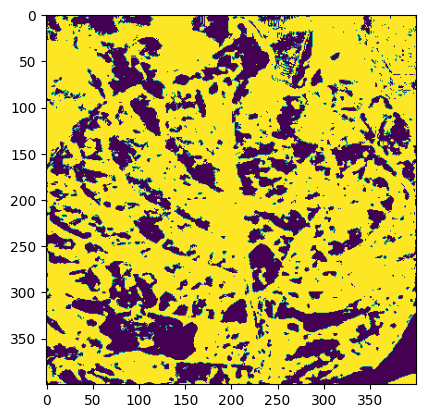

In [19]:
import numpy as np
import cv2
import os
from skimage.feature import greycomatrix, greycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Function to extract texture and edge features
def extract_texture_and_edge_features(images):
    features = []
    for img in images:
        if img.ndim == 2:
            # Grayscale image
            gray = img
        elif img.ndim == 3:
            # Color image, convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            raise ValueError("Invalid image shape. Expected 2 or 3 dimensions.")

        # Calculate Haralick texture features
        glcm = greycomatrix(gray, distances=[1], angles=[0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], levels=256, symmetric=True, normed=True)
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        correlation = greycoprops(glcm, 'correlation')[0, 0]

        segmentation_feature1=segmentation1(img)

        # Perform Canny edge detection
        edges = cv2.Canny(gray, 50, 150)
        edge_count = np.sum(edges)

        texture_and_edge_features = np.array([
            contrast,
            energy,
            homogeneity,
            correlation,
            edge_count,
            segmentation_feature1[0],
            segmentation_feature1[1],
            segmentation_feature1[2],
            segmentation_feature1[3],
            segmentation_feature1[4],
            segmentation_feature1[5],
            segmentation_feature1[6],
            segmentation_feature1[7],
            segmentation_feature1[8],
            segmentation_feature1[9],
            segmentation_feature1[10]
        ])
        features.append(texture_and_edge_features)

    return np.array(features)

# Print texture and edge feature names
print("Texture and Edge Features:")
feature_names = ['Contrast', 'Energy', 'Homogeneity', 'Correlation', 'Edge Count']
print(feature_names)

x = np.array(x)
y = np.array(y)

# Extract texture and edge features
x_features = extract_texture_and_edge_features(x)

# Prepare data
x_updated = x_features

# Feature Scaling
x_updated = x_updated / 255

# Standardize the dataset
sc = StandardScaler()
sc.fit(x_updated)
x_std = sc.transform(x_updated)

# Feature extraction and dimensionality reduction using PCA
pca = PCA(n_components=0.98)
x_pca = pca.fit_transform(x_std)

# Split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=65, test_size=0.2)

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))


In [20]:
import xgboost as xgb

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))

Training Score: 0.990625
Test Score: 0.9


In [ ]:
path = os.listdir('/content/drive/MyDrive/Insect/bgremoveImagesNew/')
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}

x=[]
y=[]
z=[]

save_folder = '/content/drive/MyDrive/Insect/Segmentation/'
for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgremoveImagesNew/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,1)

        #Canny Edge Detection,identify the boundaries (edges) of objects,
        edges = cv2.Canny(image=img, threshold1=10, threshold2=20)
        edgedetect_image=cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

        # Thresholding segmentation method
        image = cv2.cvtColor(edgedetect_image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

        # Create a green mask with the same size as the image
        mask = np.full_like(thresh, 255, dtype=np.uint8)

        # Apply the mask to the image
        result = cv2.bitwise_and(thresh, mask)

        x.append(result)
        y.append(classes[cls])
        z.append(img)
#Save the image in the specified folder

        # filename = os.path.join(save_folder, j)
        # cv2.imwrite(filename, result)

In [ ]:
import numpy as np
import cv2
import os
from skimage.feature import greycomatrix, greycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Function to extract texture features
def extract_texture_features(images):
    features = []
    for img in images:
        if img.ndim == 2:
            # Grayscale image
            gray = img
        elif img.ndim == 3:
            # Color image, convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            raise ValueError("Invalid image shape. Expected 2 or 3 dimensions.")

        # Calculate Haralick texture features
        glcm = greycomatrix(gray, distances=[1], angles=[0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], levels=256, symmetric=True, normed=True)
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        correlation = greycoprops(glcm, 'correlation')[0, 0]

        texture_features = np.array([contrast, energy, homogeneity, correlation])
        features.append(texture_features)

    return np.array(features)

# Print texture feature names
print("Texture Features:")
texture_feature_names = ['Contrast', 'Energy', 'Homogeneity', 'Correlation']

x = np.array(x)
y = np.array(y)

# Extract texture features
x_texture_features = extract_texture_features(x)

# Prepare data
x_updated = x.reshape(len(x), -1)
# x_updated = np.concatenate((x_updated, x_texture_features, x_shape_features), axis=1)
x_updated.shape

# Feature Scaling
x_updated = x_updated / 255

# Standardize the dataset
sc = StandardScaler()
sc.fit(x_updated)
x_std = sc.transform(x_updated)

# Feature extraction and dimensionality reduction using PCA
pca = PCA(n_components=0.98)
x_pca = pca.fit_transform(x_std)

# Split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=65, test_size=0.2)

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))

Texture Features:


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

Training Score: 0.9984544049459042
Test Score: 0.7962962962962963
